# Проект: Линейные модели в машинном обучении

## Проблема проекта

Фермер, владелец молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах.

Таким образом для решения проблемы в ходе реализации проекта создаются две прогнозные модели для отбора бурёнок в поголовье.
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).


## Введение

### Описание исследования

Фермер молочного хозяйства «Вольный луг» планирует расширить поголовье коров, закупив новых животных у ассоциации «ЭкоФерма». Для минимизации рисков ему необходимы инструменты прогнозирования:

Удой молока (регрессия) — отбор коров с годовым удоем ≥ 6000 кг.
Вкус молока (классификация) — гарантия высокого качества продукта.

### Суть исследования

Разработка двух моделей машинного обучения:
Линейная регрессия для прогноза удоя.
Логистическая регрессия для оценки вероятности получения вкусного молока.
### Задачи исследования

1. Предобработка данных (пропуски, дубликаты, типы данных).
2. EDA: анализ распределений, выбросов, корреляций.
3. Построение и оценка моделей (R², MSE, MAE, RMSE для регрессии; accuracy, precision, recall для классификации).
4. Прогнозирование для новых данных (cow_buy.csv).
5. Формирование рекомендаций для фермера.
### Действия, необходимые для достижения поставленной цели

1. Загрузка и предобработка данных
2. Исследовательский анализ данных (EDA)
3. Подготовка данных для моделей
4. Построение и оценка моделей
5. Прогнозирование для новых данных (cow_buy.csv)
6. Формирование выводов и рекомендаций
7. Документирование и визуализация
### Исходные данные

ferma_main.csv — текущее стадо (удой, характеристики корма, пастбища, молока).

ferma_dad.csv — имена отцов коров.

cow_buy.csv — кандидаты на покупку (без целевых признаков).
### План исследования

1. Загрузка и предобработка:

Проверка на пропуски/дубликаты.
Приведение типов данных.

2. EDA:

Визуализация распределений.
Корреляционный анализ.

3. Моделирование:

Регрессия: 3 варианта (базовая, с преобразованием признаков, с добавлением данных об отцах).
Классификация: подбор порога для минимизации критичной ошибки.

4. Прогнозирование:

Добавление недостающих признаков в cow_buy.csv.
Отбор коров по критериям (удой ≥ 6000 кг + вкусное молоко).

5. Выводы:

Рекомендации по покупке.
Оценка ограничений моделей.

## 1. Загрузка и предобработка

In [143]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import os

from phik import phik_matrix

In [146]:
def load_data(pth1, pth2, sep=';'):

    if os.path.exists(pth1):
        return pd.read_csv(pth1, sep=sep)
    elif os.path.exists(pth2):
        return pd.read_csv(pth2, sep=sep)
    else:
        print(f'Ошибка: файлы не найдены по путям:\n{pth1}\n{pth2}')
        return None

#df_ferma_main
pth1 = '/Users/mac/Yandex.Disk.localized/docs/studies/Yandex/DA/МЛ/П/Cows/ferma_main.csv'
pth2 = '/datasets/ferma_main.csv'
#df_ferma_dad
pth3 = '/Users/mac/Yandex.Disk.localized/docs/studies/Yandex/DA/МЛ/П/Cows/ferma_dad.csv'
pth4 = '/datasets/ferma_dad.csv'
#df_cow_buy
pth5 = '/Users/mac/Yandex.Disk.localized/docs/studies/Yandex/DA/МЛ/П/Cows/cow_buy.csv'
pth6 = '/datasets/cow_buy.csv'

# Загрузка данных
df_ferma_main = load_data(pth1, pth2)
df_ferma_dad = load_data(pth3, pth4)
df_cow_buy = load_data(pth5, pth6)

In [147]:
df_ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [148]:
#Приведение к змеиному регистру
df_ferma_main = df_ferma_main.rename(columns={'Удой, кг': 'Удой_кг'})
df_ferma_main = df_ferma_main.rename(columns={'ЭКЕ (Энергетическая кормовая единица)': 'ЭКЕ'})
df_ferma_main = df_ferma_main.rename(columns={'Сырой протеин, г': 'Сырой_протеин_г'})
df_ferma_main = df_ferma_main.rename(columns={'СПО (Сахаро-протеиновое соотношение)': 'СПО'})
df_ferma_main = df_ferma_main.rename(columns={'порода папы_быка': 'порода_папы_быка'})
df_ferma_main = df_ferma_main.rename(columns={'Жирность,%': 'Жирность_%'})
df_ferma_main = df_ferma_main.rename(columns={'Белок,%': 'Белок_%'})
df_ferma_main = df_ferma_main.rename(columns={'Вкус молока': 'Вкус_молока'})
df_ferma_main.head()

,id,Удой_кг,ЭКЕ,Сырой_протеин_г,СПО,Порода,Тип пастбища,порода_папы_быка,Жирность_%,Белок_%,Вкус_молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [149]:
df_ferma_dad = df_ferma_dad.rename(columns={'Имя Папы': 'Имя_Папы'})
df_ferma_dad.head()

,id,Имя_Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [150]:
df_cow_buy = df_cow_buy.rename(columns={'Тип пастбища': 'Тип_пастбища'})
df_cow_buy = df_cow_buy.rename(columns={'порода папы_быка': 'порода_папы_быка'})
df_cow_buy = df_cow_buy.rename(columns={'Текущая_жирность,%': 'Текущая_жирность_%'})
df_cow_buy = df_cow_buy.rename(columns={'Текущий_уровень_белок,%': 'Текущий_уровень_белок_%'})
df_cow_buy.head()

,Порода,Тип_пастбища,порода_папы_быка,Имя_папы,Текущая_жирность_%,Текущий_уровень_белок_%,Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


## Описание датасетов фермерского стада

### Файл `ferma_main.csv`
Содержит данные о текущем стаде фермера.

#### Структура данных:
- **id** — уникальный идентификатор коровы
- **Удой, кг** — масса молока в год (кг)
- **ЭКЕ** — энергетическая кормовая единица (показатель питательности)
- **Сырой протеин, г** — содержание протеина в корме (г)
- **СПО** — сахаро-протеиновое соотношение
- **Порода** — порода коровы
- **Тип пастбища** — ландшафт лугов
- **порода папы_быка** — порода отца коровы
- **Жирность,%** — содержание жиров в молоке (%)
- **Белок,%** — содержание белков в молоке (%)
- **Вкус молока** — бинарная оценка вкуса (вкусно/не вкусно)
- **Возраст** — бинарный признак (<2 лет / >2 лет)

#### Группировка признаков:
1. **Характеристики коровы**:
   - id
   - Порода
   - порода папы_быка
   - Возраст

2. **Характеристики корма**:
   - ЭКЕ
   - Сырой протеин, г
   - СПО

3. **Характеристика пастбища**:
   - Тип пастбища

4. **Характеристики молока**:
   - Удой, кг
   - Жирность,%
   - Белок,%
   - Вкус молока

---

### Файл `ferma_dad.csv`
Содержит информацию об отцах коров.

#### Структура:
- **id** — идентификатор коровы
- **Имя Папы** — имя отца коровы

---

### Файл `cow_buy.csv`
Содержит данные о коровах "ЭкоФермы" для потенциальной покупки.

#### Структура:
- **Порода** — порода коровы
- **Тип пастбища** — ландшафт лугов
- **порода папы_быка** — порода отца
- **Имя_папы** — имя отца
- **Текущая_жирность,%** — жирность молока (%)
- **Текущий_уровень_белок,%** — содержание белка (%)
- **Возраст** — бинарный признак (<2 лет / >2 лет)

#### Особенности:
1. Параметры корма (ЭКЕ, Сырой протеин, СПО) отсутствуют
   - Планируется увеличение каждого параметра на 5% для новых коров
2. Отсутствуют целевые признаки:
   - Удой, кг (нужно предсказать)
   - Вкус молока (нужно предсказать)
3. Показатели жирности и белка указаны на момент продажи (при кормлении от "ЭкоФермы")

### Обработка пропусков

In [151]:
print(df_ferma_main.isna().sum())
print(df_ferma_dad.isna().sum())
print(df_cow_buy.isna().sum())

id                  0
Удой_кг             0
ЭКЕ                 0
Сырой_протеин_г     0
СПО                 0
Порода              0
Тип пастбища        0
порода_папы_быка    0
Жирность_%          0
Белок_%             0
Вкус_молока         0
Возраст             0
dtype: int64
id          0
Имя_Папы    0
dtype: int64
Порода                     0
Тип_пастбища               0
порода_папы_быка           0
Имя_папы                   0
Текущая_жирность_%         0
Текущий_уровень_белок_%    0
Возраст                    0
dtype: int64


### Обработка дубликатов

In [152]:
print(df_ferma_main.duplicated().sum())
print(df_ferma_dad.duplicated().sum())
print(df_cow_buy.duplicated().sum())

5
0
4


In [153]:
df_ferma_main.loc[df_ferma_main['порода_папы_быка'] == 'Айдиалл', 'порода_папы_быка'] = 'Айдиал'

In [154]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                634 non-null    int64 
 1   Удой_кг           634 non-null    int64 
 2   ЭКЕ               634 non-null    object
 3   Сырой_протеин_г   634 non-null    int64 
 4   СПО               634 non-null    object
 5   Порода            634 non-null    object
 6   Тип пастбища      634 non-null    object
 7   порода_папы_быка  634 non-null    object
 8   Жирность_%        634 non-null    object
 9   Белок_%           634 non-null    object
 10  Вкус_молока       634 non-null    object
 11  Возраст           634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


In [155]:
df_ferma_dad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя_Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [156]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип_пастбища             20 non-null     object
 2   порода_папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность_%       20 non-null     object
 5   Текущий_уровень_белок_%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


### Преобразование типов данных

In [157]:
def to_numeric(df, numeric_cols):
    for col in numeric_cols:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [158]:
numeric_cols_fm = ['Удой_кг', 'ЭКЕ', 'Сырой_протеин_г', 'СПО', 'Жирность_%', 'Белок_%']
df_ferma_main = to_numeric(df_ferma_main, numeric_cols_fm)

In [159]:
df_ferma_main["СПО"] = df_ferma_main["СПО"].astype(str).str.replace(",", ".").str.strip()
df_ferma_main["СПО"] = pd.to_numeric(df_ferma_main["СПО"], errors="coerce")

df_ferma_main["ЭКЕ"] = df_ferma_main["ЭКЕ"].astype(str).str.replace(",", ".").str.strip()
df_ferma_main["ЭКЕ"] = pd.to_numeric(df_ferma_main["ЭКЕ"], errors="coerce")

df_ferma_main["Жирность_%"] = df_ferma_main["Жирность_%"].astype(str).str.replace(",", ".").str.strip()
df_ferma_main["Жирность_%"] = pd.to_numeric(df_ferma_main["Жирность_%"], errors="coerce")

print(df_ferma_main.dtypes)

id                    int64
Удой_кг               int64
ЭКЕ                 float64
Сырой_протеин_г       int64
СПО                 float64
Порода               object
Тип пастбища         object
порода_папы_быка     object
Жирность_%          float64
Белок_%             float64
Вкус_молока          object
Возраст              object
dtype: object


In [160]:
numeric_cols_cb = ['Текущая_жирность_%', 'Текущий_уровень_белок_%']
df_cow_buy = to_numeric(df_cow_buy, numeric_cols_cb)
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип_пастбища             20 non-null     object 
 2   порода_папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность_%       20 non-null     object 
 5   Текущий_уровень_белок_%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.2+ KB


In [161]:
df_cow_buy["Текущая_жирность_%"] = df_cow_buy["Текущая_жирность_%"].astype(str).str.replace(",", ".").str.strip()
df_cow_buy["Текущая_жирность_%"] = pd.to_numeric(df_cow_buy["Текущая_жирность_%"], errors="coerce")
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип_пастбища             20 non-null     object 
 2   порода_папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность_%       20 non-null     float64
 5   Текущий_уровень_белок_%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


В рамках загрузки и предоработки данных выполнены следующие шаги:
1. Загружены 3 датасета: ferma_main.csv, ferma_dad.csv, cow_buy.csv  

2. Осуществлен первичный просмотр данных

3. Унификация названий столбцов

Приведены к змеиному_регистру для единообразия (например, Порода → порода).

2. Проверка на дубликаты и пропуски

Обнаружены и удалены явные дубликаты (полные повторы строк).
Пропущенные значения (NaN) в данных отсутствуют.

3. Коррекция данных

Исправлены опечатки в ячейках (например, Голштинская → голштинская).
Приведены типы данных к корректным форматам (числа — к float/int, категории — к str).

##  2. EDA

### Статистический анализ количественных признаков

In [162]:
print("Числовые признаки:")
df_ferma_main[numeric_cols_fm].describe()

Числовые признаки:


,Удой_кг,ЭКЕ,Сырой_протеин_г,СПО,Жирность_%,Белок_%
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [163]:
print("Числовые признаки:")
print(df_cow_buy[numeric_cols_cb].describe())

Числовые признаки:
       Текущая_жирность_%  Текущий_уровень_белок_%
count           20.000000                20.000000
mean             3.577500                 3.069500
std              0.126818                 0.010339
min              3.340000                 3.046000
25%              3.510000                 3.064000
50%              3.590000                 3.074000
75%              3.650000                 3.076000
max              3.770000                 3.081000


### Статистический анализ категориальных признаков

In [164]:
df_ferma_main = df_ferma_main.merge(
    df_ferma_dad,
    on='id',
    how='left',
    suffixes=('', '_dad') 
)
print(df_ferma_main.tail())

      id  Удой_кг   ЭКЕ  Сырой_протеин_г   СПО           Порода Тип пастбища  \
629  627     5970  14.4             1837  0.88  РефлешнСоверинг    Холмистое   
630  627     5970  14.4             1837  0.88  РефлешнСоверинг    Холмистое   
631  627     5970  14.4             1837  0.88  РефлешнСоверинг    Холмистое   
632  627     5970  14.4             1837  0.88  РефлешнСоверинг    Холмистое   
633  627     5970  14.4             1837  0.88  РефлешнСоверинг    Холмистое   

    порода_папы_быка  Жирность_%  Белок_% Вкус_молока      Возраст Имя_Папы  
629          Соверин        3.64    3.075   не вкусно  более_2_лет    Барин  
630          Соверин        3.64    3.075   не вкусно  более_2_лет    Барин  
631          Соверин        3.64    3.075   не вкусно  более_2_лет    Барин  
632          Соверин        3.64    3.075   не вкусно  более_2_лет    Барин  
633          Соверин        3.64    3.075   не вкусно  более_2_лет    Барин  


In [165]:
categorical_cols_cb = ["Порода", "Тип_пастбища", "порода_папы_быка", "Имя_папы", "Возраст"]
print("\nКатегориальные признаки:")
for col in categorical_cols_cb:
    print(f"\n")
    print(df_cow_buy[col].value_counts())


Категориальные признаки:


Порода
РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: count, dtype: int64


Тип_пастбища
равнинное    11
холмистое     9
Name: count, dtype: int64


порода_папы_быка
Соверин    12
Айдиал      8
Name: count, dtype: int64


Имя_папы
Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: count, dtype: int64


Возраст
более_2_лет    15
менее_2_лет     5
Name: count, dtype: int64


In [166]:
categorical_cols_fm = ["Порода", "порода_папы_быка", "Вкус_молока", "Возраст", "Имя_Папы"]
print("\nКатегориальные признаки:")
for col in categorical_cols_fm:
    print(df_ferma_main[col].value_counts())


Категориальные признаки:
Порода
Вис Бик Айдиал     373
РефлешнСоверинг    261
Name: count, dtype: int64
порода_папы_быка
Айдиал     318
Соверин    316
Name: count, dtype: int64
Вкус_молока
вкусно       371
не вкусно    263
Name: count, dtype: int64
Возраст
более_2_лет    524
менее_2_лет    110
Name: count, dtype: int64
Имя_Папы
Барин       245
Буйный      215
Соловчик    110
Геркулес     64
Name: count, dtype: int64


In [167]:
print(df_ferma_dad['Имя_Папы'].value_counts())

Имя_Папы
Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: count, dtype: int64


### Графики для переменных

In [168]:
def plot_numeric_features(df, numeric_cols, bins_dict=None):
    """
    Строит гистограммы и boxplot'ы для числовых признаков.
    
    Параметры:
    ----------
    df : DataFrame
        Датафрейм с данными
    numeric_cols : list
        Список числовых признаков для визуализации
    bins_dict : dict, optional
        Словарь с указанием количества корзин для конкретных признаков
        Пример: {'Белок_%': 15, 'Текущая_жирность_%': 10}
    """
    sns.set(style="whitegrid")
    
    for col in numeric_cols:
        fig, axes = plt.subplots(2, 1, figsize=(12, 8))  # Увеличил высоту для лучшего отображения
        
        # Определяем количество корбин
        bins = bins_dict.get(col, 30) if bins_dict else 30
        
        # Гистограмма с KDE
        hist = sns.histplot(df[col], kde=True, bins=bins, color='skyblue', ax=axes[0])
        axes[0].set_title(f"Распределение: {col}", pad=15)
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Величина")
    
        # Добавляем подписи к столбцам
        for bar in hist.patches:
            height = bar.get_height()
            if height > 0:
                axes[0].annotate(
                    f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=8,
                    color='black'
                )

        # Boxplot
        sns.boxplot(x=df[col], color='lightcoral', ax=axes[1])
        axes[1].set_title(f"Boxplot: {col}", pad=15)
        
        # Добавляем вертикальные линии для среднего и медианы
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[1].axvline(mean_val, color='blue', linestyle='--', label=f'Среднее: {mean_val:.2f}')
        axes[1].axvline(median_val, color='green', linestyle='-', label=f'Медиана: {median_val:.2f}')
        axes[1].legend()

        plt.tight_layout()
        plt.show()

In [169]:
def plot_categorical_features(df, categorical_cols):
    """Строит столбчатые диаграммы для категориальных признаков."""
    sns.set(style="whitegrid")
    
    for col in categorical_cols:
        plt.figure(figsize=(6, 4))
        ax = sns.countplot(data=df, x=col, 
                      order=df[col].value_counts().index,
                      palette='pastel')
        plt.title(f"Распределение категорий: {col}")
        plt.xlabel(col)
        plt.ylabel("Количество")
        plt.xticks(rotation=45)

        # Добавляем подписи над столбцами
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(
                    f'{int(height)}',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    fontsize=9,
                    color='black'
                )

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

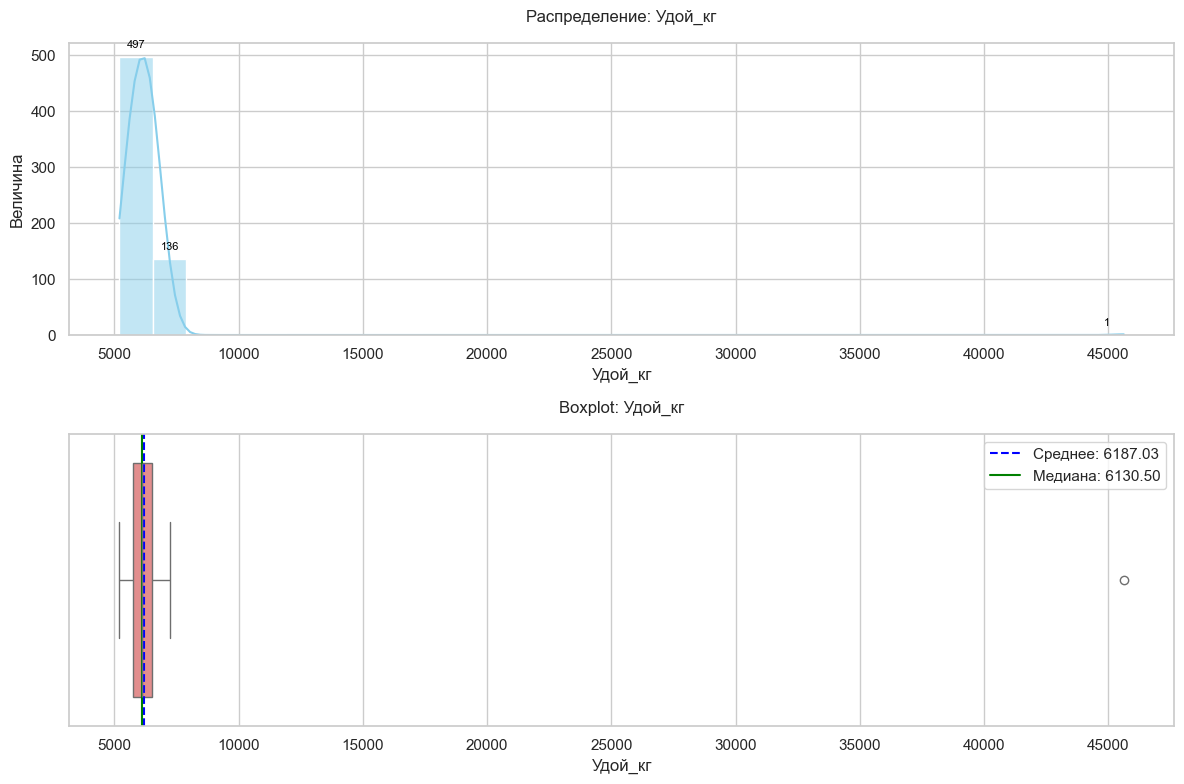

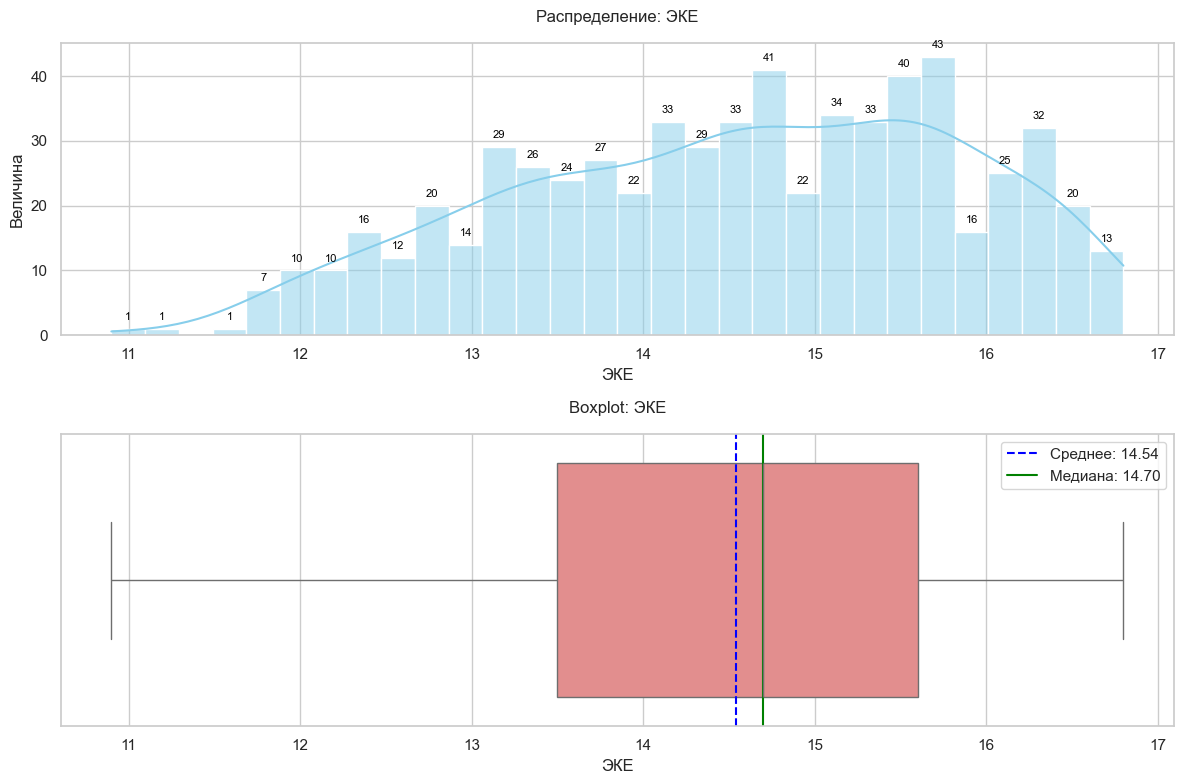

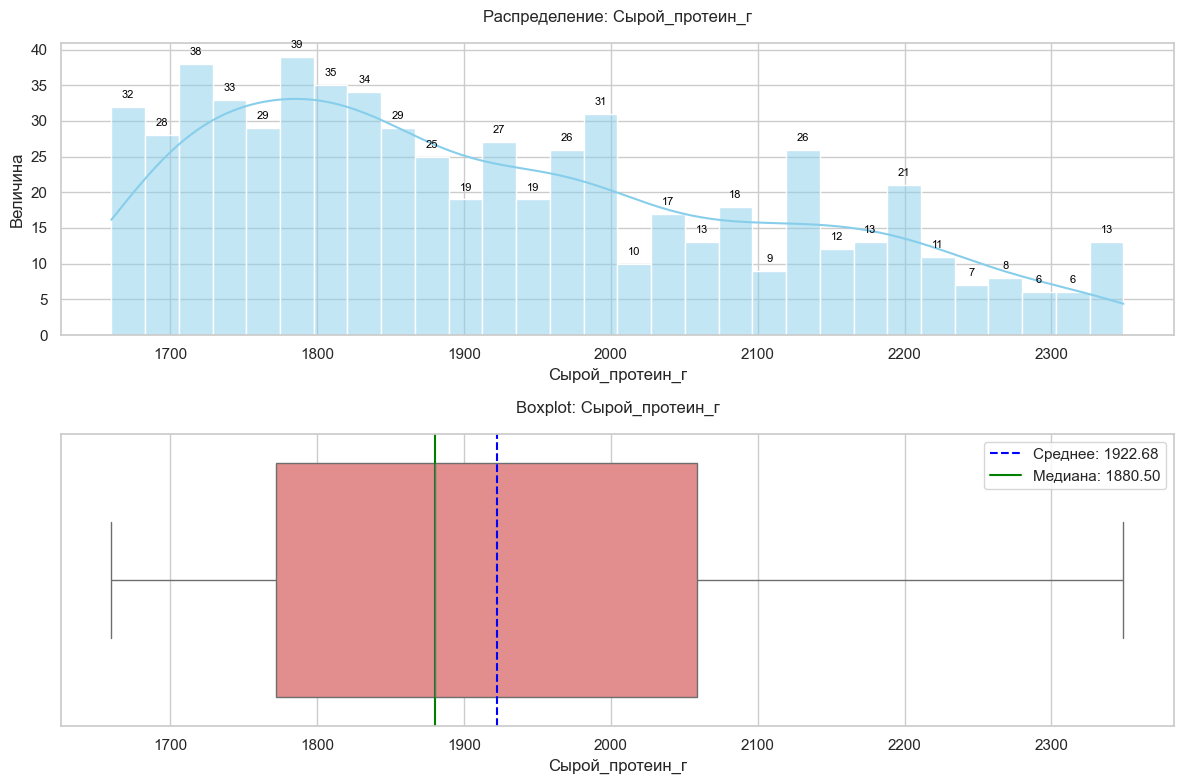

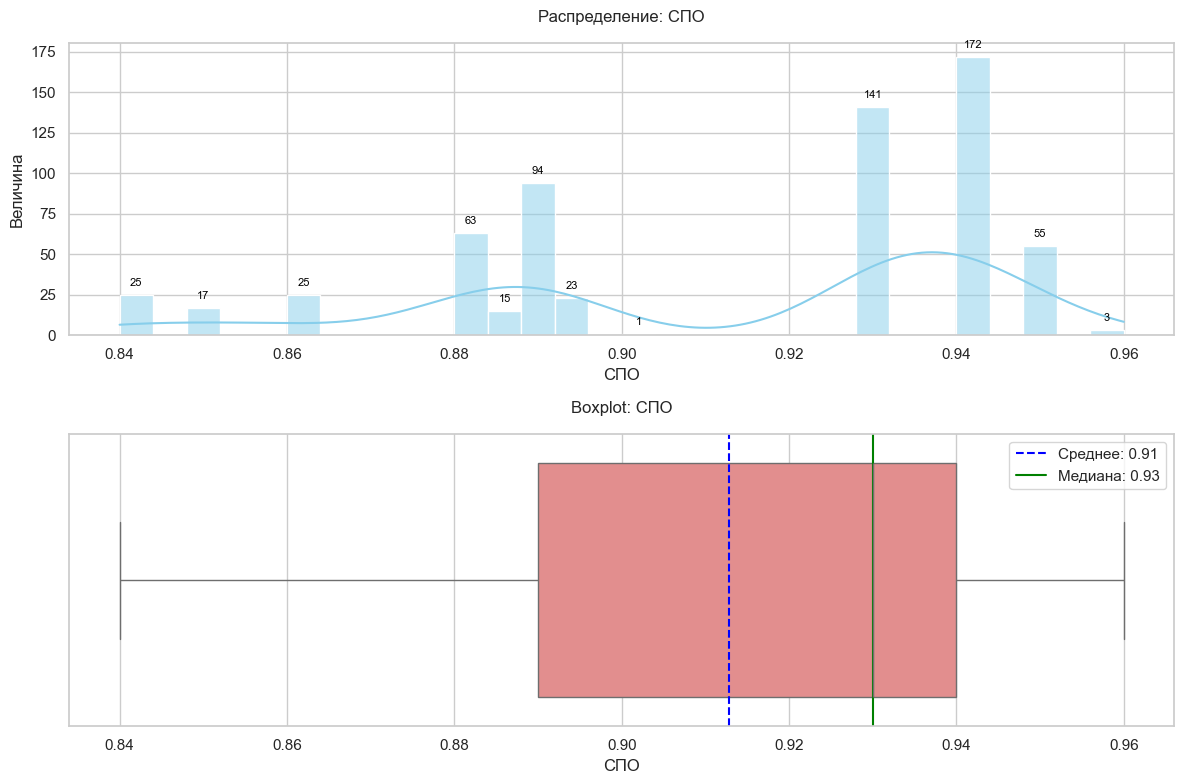

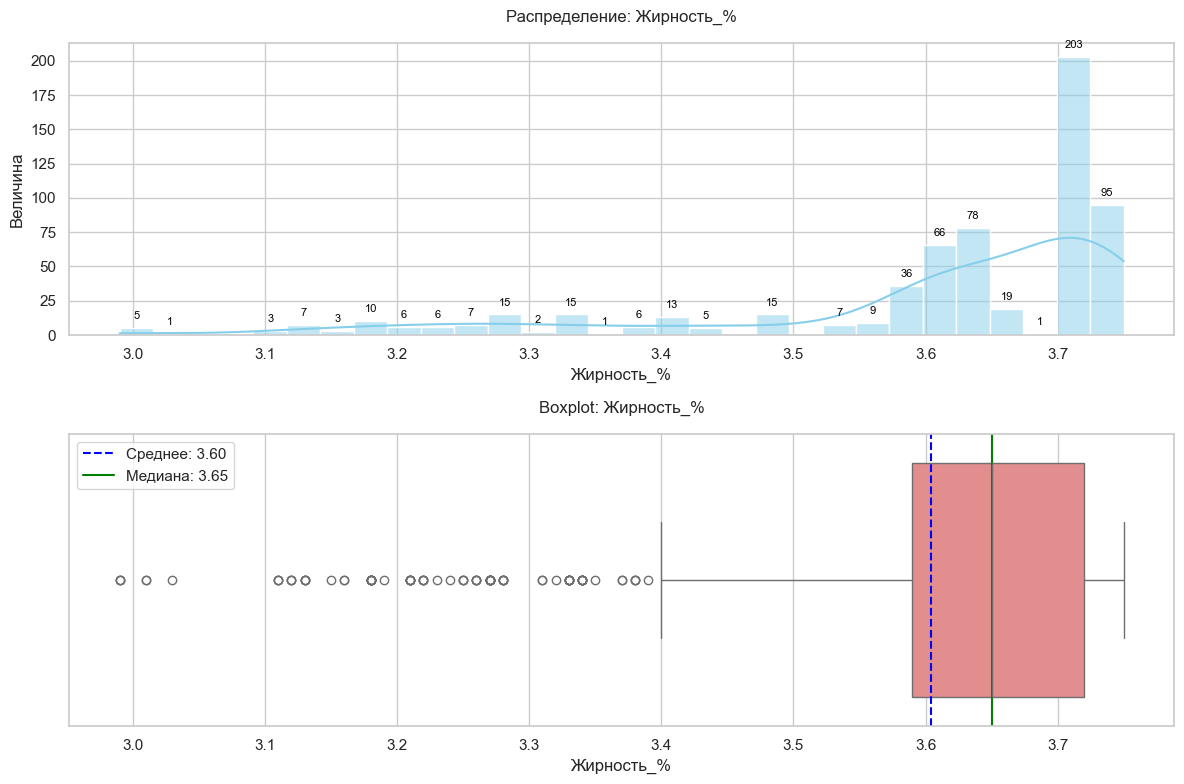

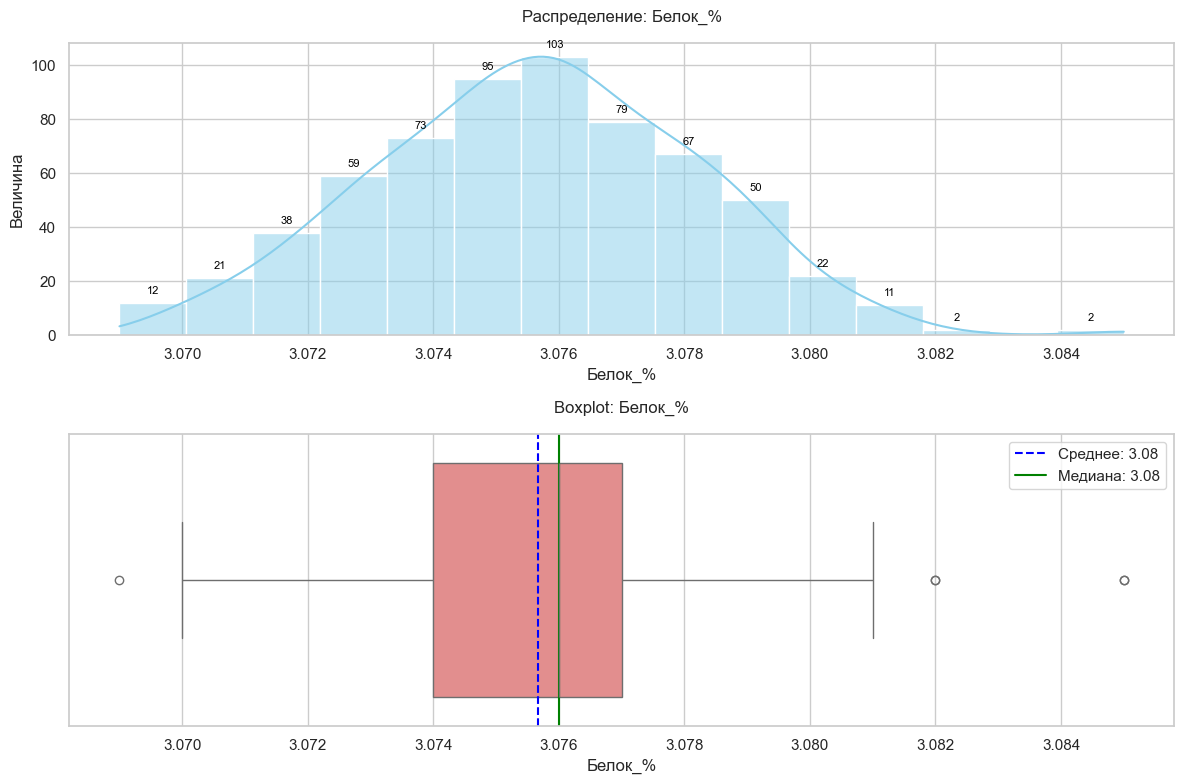

In [170]:
bins_dict = {
    'Белок_%': 15,
    'Текущая_жирность_%': 7,
    'Текущий_уровень_белок_%': 8
}

plot_numeric_features(df_ferma_main, numeric_cols_fm, bins_dict)


/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col,
/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col,
/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col,
/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarnin

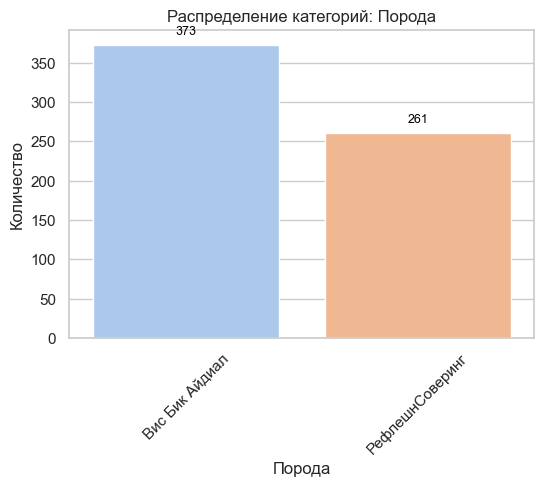

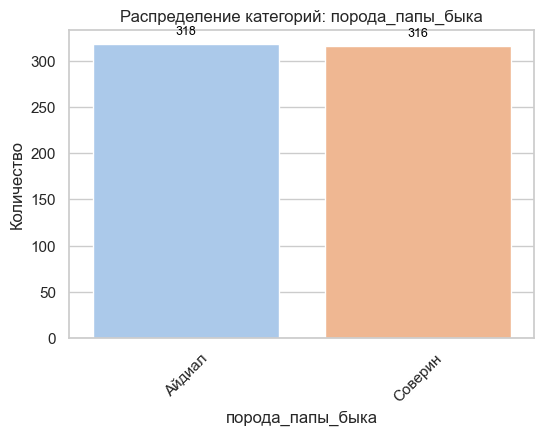

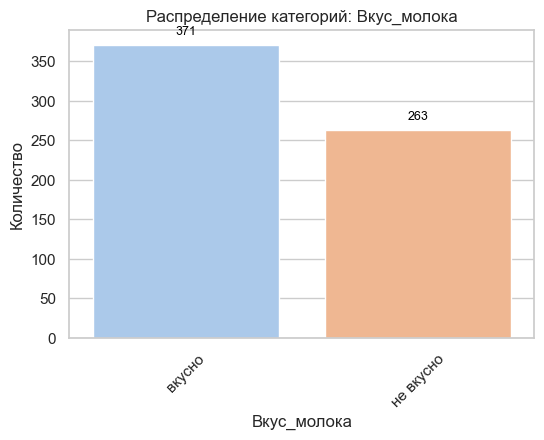

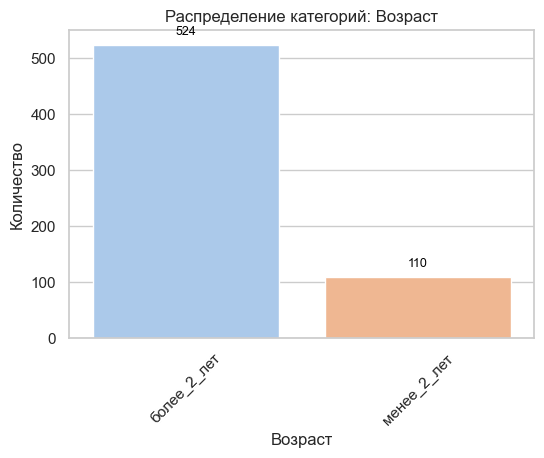

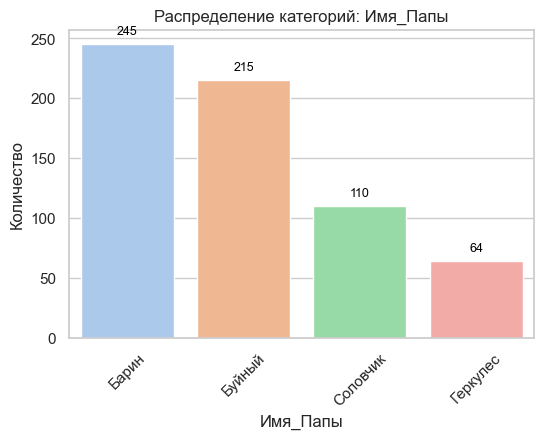

In [171]:
plot_categorical_features(df_ferma_main, categorical_cols_fm)

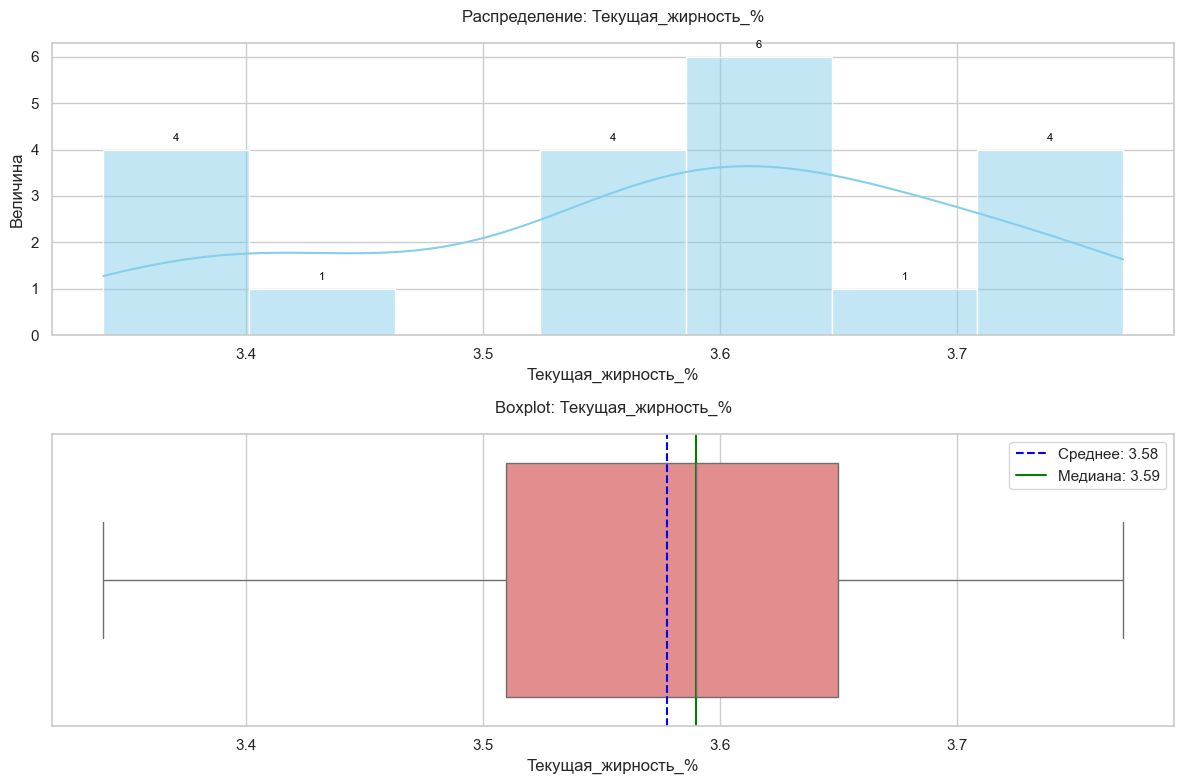

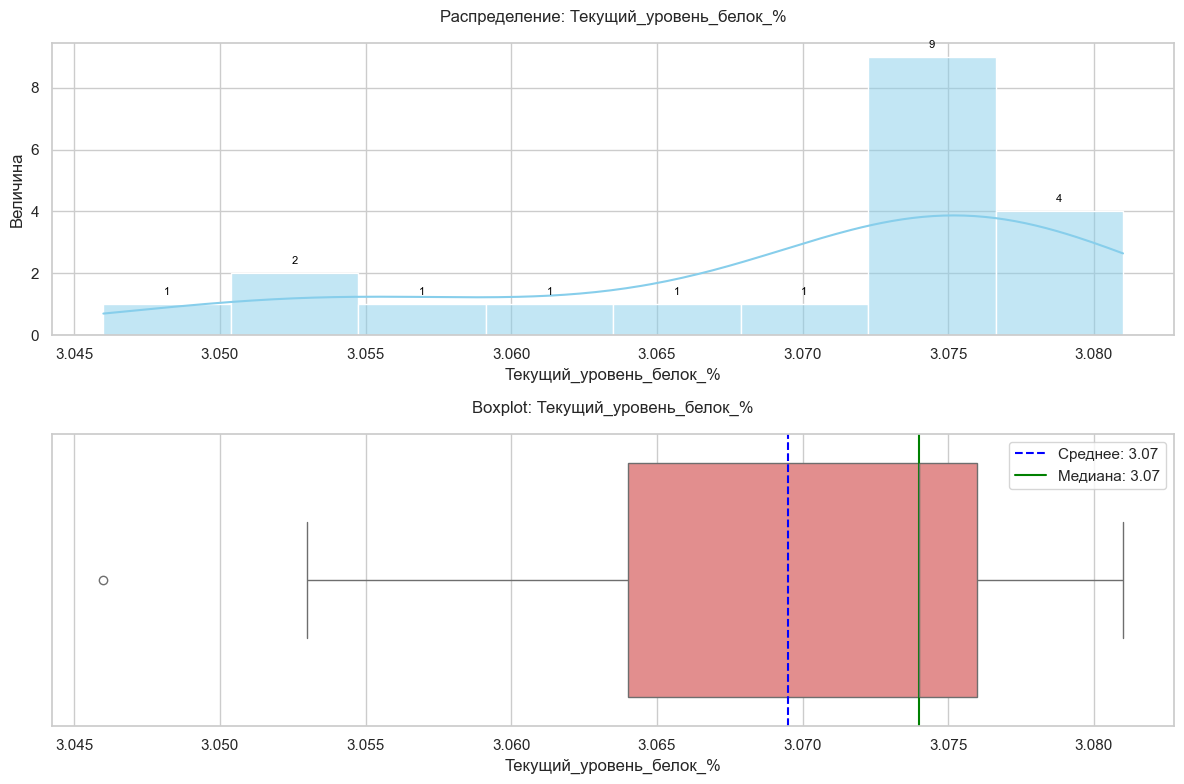

In [172]:
plot_numeric_features(df_cow_buy, numeric_cols_cb, bins_dict)

/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col,
/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col,
/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col,
/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarnin

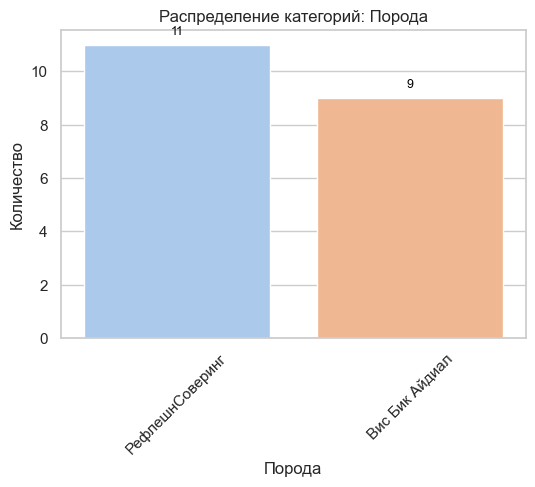

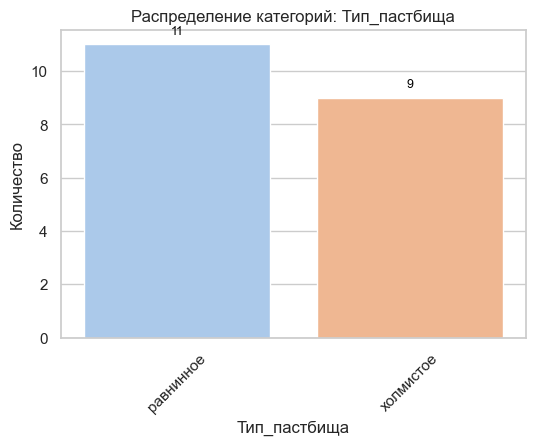

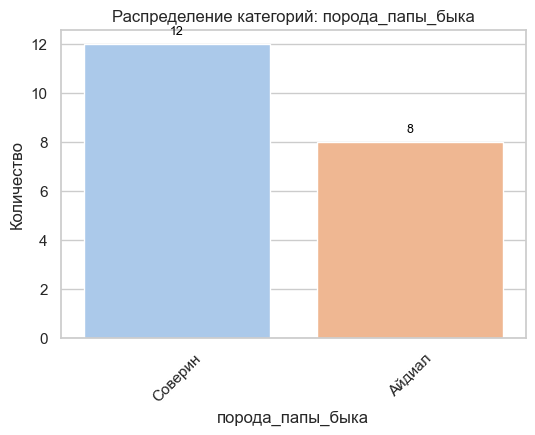

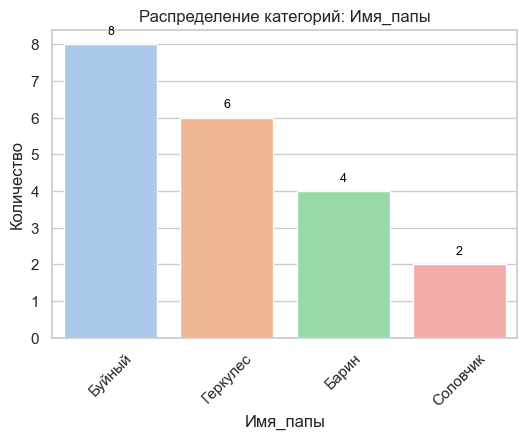

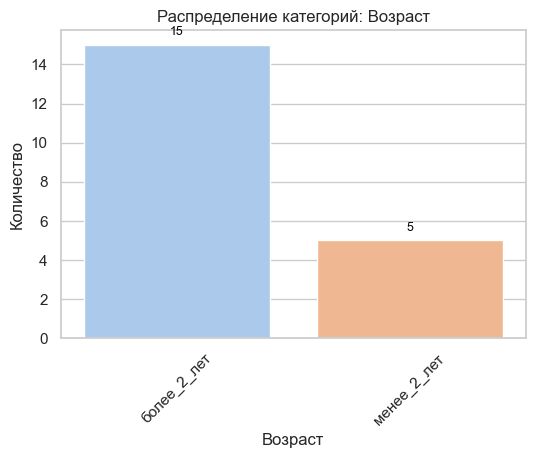

In [173]:
plot_categorical_features(df_cow_buy, categorical_cols_cb)

Распределение показателей спо и жирность_% - неравномерно, выделяются группы значений. Эти показатели стоит перевести в группу категориальных, что должно улучшить качество модели. 

In [174]:
df_ferma_main.dtypes

id                    int64
Удой_кг               int64
ЭКЕ                 float64
Сырой_протеин_г       int64
СПО                 float64
Порода               object
Тип пастбища         object
порода_папы_быка     object
Жирность_%          float64
Белок_%             float64
Вкус_молока          object
Возраст              object
Имя_Папы             object
dtype: object

In [175]:
def categorize_fat(fat):
    if fat <= 3.57:
        return 'Низкая жирность'
    elif 3.58 <= fat <= 3.68:
        return 'Средняя жирность'
    else:
        return 'Высокая жирность'

def categorize_spo(spo):
    if spo <= 0.87:
        return 'Низкое СПО'
    elif 0.88 <= spo <= 0.91:
        return 'Среднее СПО'
    else:
        return 'Высокое СПО'

df_ferma_main['Жирность_%'] = df_ferma_main['Жирность_%'].apply(categorize_fat)
df_ferma_main['СПО_кат'] = df_ferma_main['СПО'].apply(categorize_spo)
numeric_cols_fm = ['Удой_кг', 'ЭКЕ', 'Сырой_протеин_г', 'Белок_%']
categorical_cols_fm = ["Порода", "порода_папы_быка", "Вкус_молока", "Возраст", "Имя_Папы", "Жирность_%", "СПО_кат"]

df_cow_buy['Текущая_жирность_%'] = df_cow_buy['Текущая_жирность_%'].apply(categorize_fat)
numeric_cols_cb = ['Текущий_уровень_белок_%']
categorical_cols_cb = ["Порода", "Тип_пастбища", "порода_папы_быка", "Имя_папы", "Возраст", 'Текущая_жирность_%']

/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col,
/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col,
/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col,
/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarnin

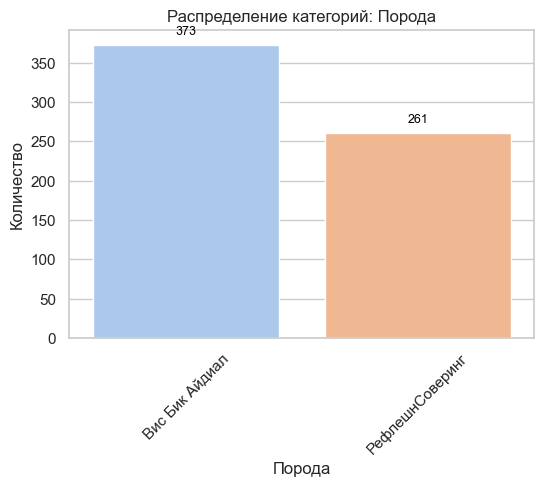

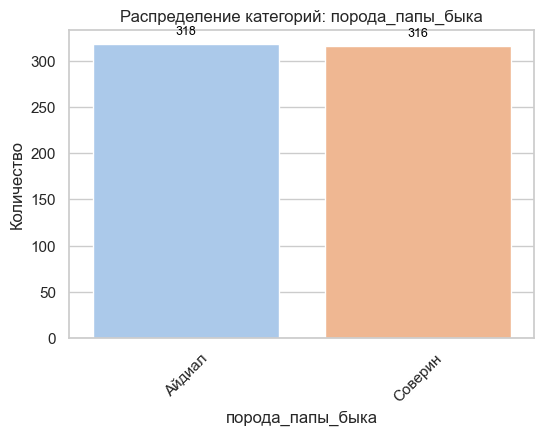

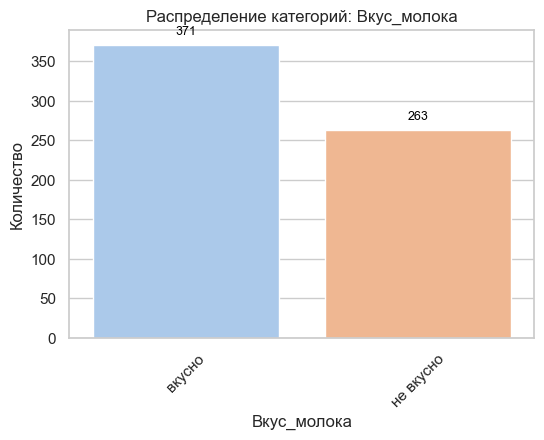

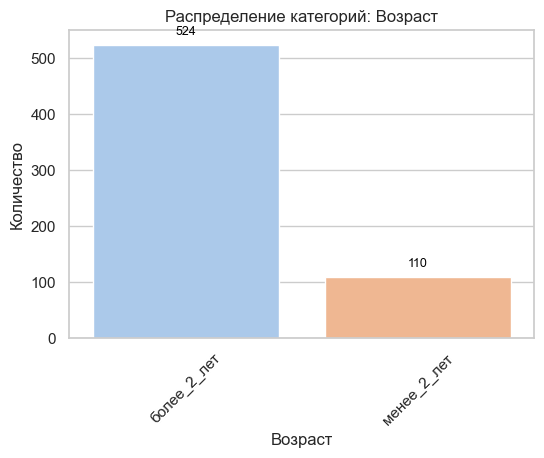

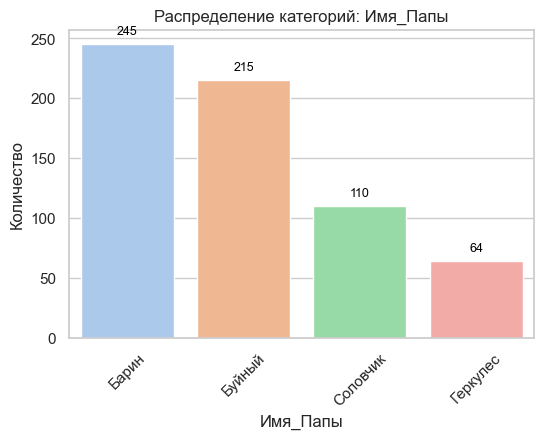

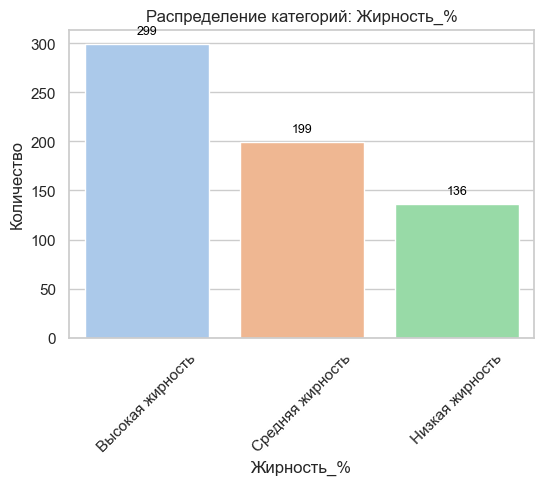

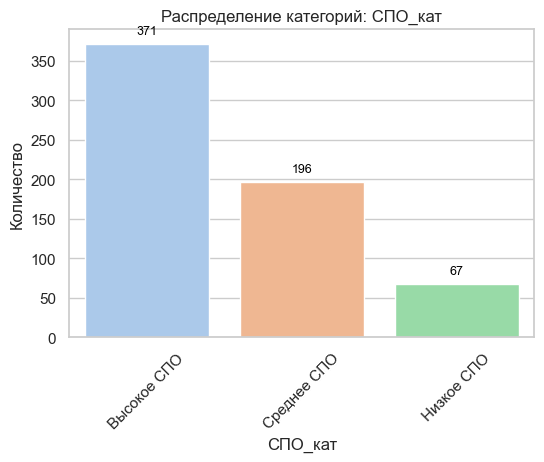

In [176]:
plot_categorical_features(df_ferma_main, categorical_cols_fm)

/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col,
/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col,
/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col,
/var/folders/qc/qtg4sxnd7k96y368fq_7rzsw0000gn/T/ipykernel_83472/3514110906.py:7: FutureWarnin

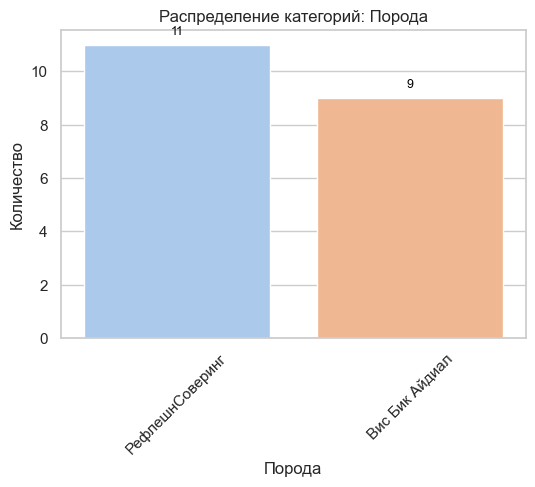

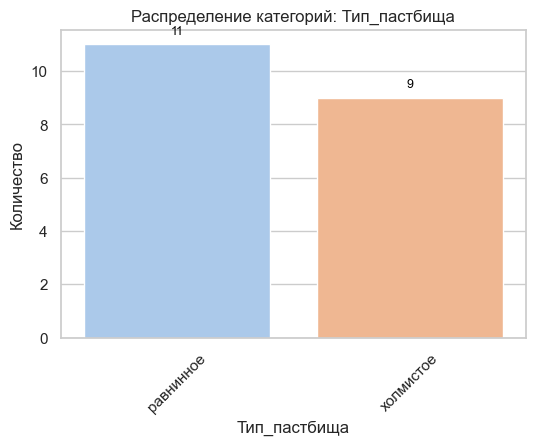

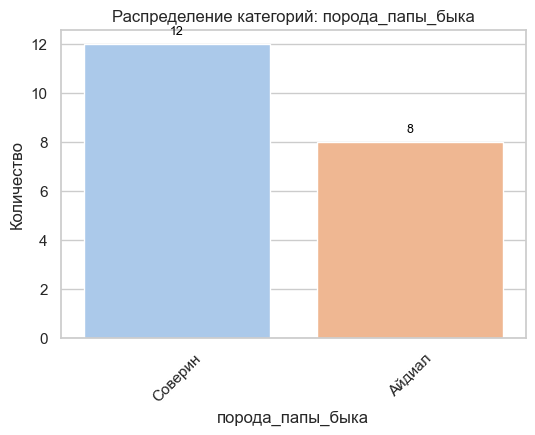

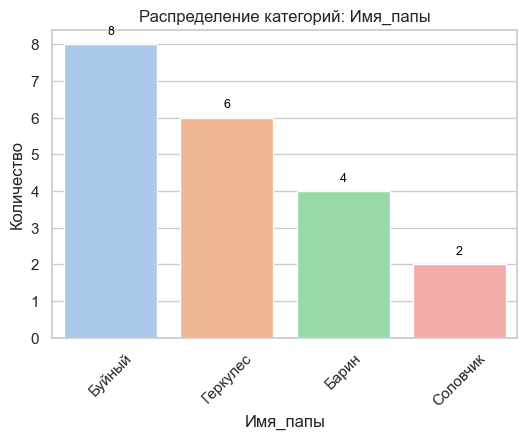

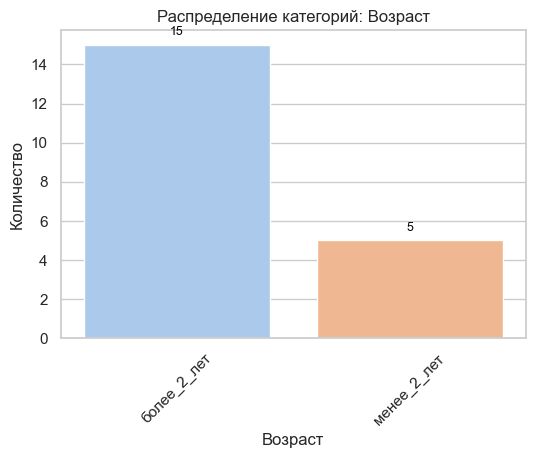

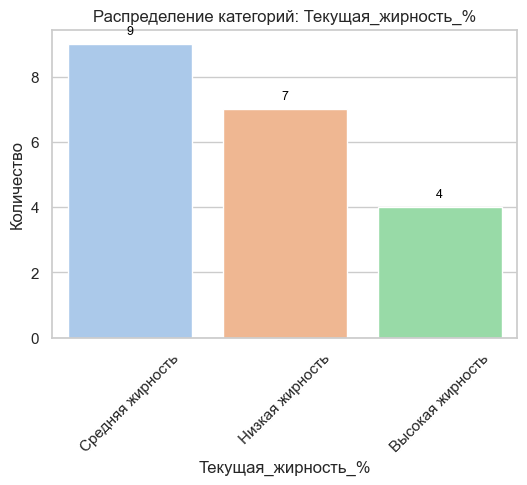

In [177]:
plot_categorical_features(df_cow_buy, categorical_cols_cb)

Удалим выбросы

In [178]:
df_ferma_main = df_ferma_main[(df_ferma_main['Удой_кг'] <= 20000)]

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Есть, отлично, выброс по удою (45 тонн молока в год - это фантастика!) обнаружен и удален в таблице с текущим стадом фермера.
    
p.s. обрати внимание на строку с id == 17 в датафрейме с именами пап-быков. Удалять её явно может быть и не требуется (при корректном объединении датафреймов (ниже) этот момент будет обработан автоматически), но отметить этот момент я всё-таки хочу (на всякий случай).



</div>

### Выводы о данных ferma_main и fearma_dad:

1. Объем удоя распределяется в пределах 5 -7 тыс. кг. Имеется выброс по удою, превышающий 45616 кг.
Рапределение показателя ЭКЕ имеет левостороннюю ассиметрию. Медианное значение составляет 14.5
Рапределение сырого протеина имеет правостороннюю ассиметрию. Медианное значение составляет 1923.36 г.
Рапределение показателя СПО имеет левостороннюю ассиметрию. Медианное значение составляет 0.913116.
Рапределение жирности имеет сильную левостороннюю ассиметрию. Медианное значение составляет 3.6 %.

2. Большинство коров имеют породу Вис Бик Айдиал и около 40 процентов коров имеют породу Рефлешн Соверинг

3. По атрибуту порода_папы_быка наиболбее часто встречаются значения Айдиалл, затем Соверин.

4. Зачастую молоко характеризуется как вкусное.

5. Подавляющее большинство коров старше 2 лет.

6. Наиболее популярное имя папы быка - Барин, наименее - Геркулес


### Выводы о данных cow_buy:

1. Рапределение жирности имеет слабую левостороннюю ассиметрию. Медианное значение составляет 3.57%.

2. Рапределение текущего уровня белка имеет левостороннюю ассиметрию. Медианное значение составляет 3.06 %.

3. Породы коров для покупки имеют породу Вис Бик Айдиал и Рефлешн Соверинг в одинаковом соотношении.

4. Тип пастбища холмистое или равнинное в одинаковом соотношении.

5. По атрибуту порода_папы_быка у коров на покупку наиболбее часто встречаются значения Соверин, Затем Айдиал.




### Корелляционный анализ признаков датасета

In [179]:
df_ferma_main.dtypes

id                    int64
Удой_кг               int64
ЭКЕ                 float64
Сырой_протеин_г       int64
СПО                 float64
Порода               object
Тип пастбища         object
порода_папы_быка     object
Жирность_%           object
Белок_%             float64
Вкус_молока          object
Возраст              object
Имя_Папы             object
СПО_кат              object
dtype: object

In [180]:
numeric_cols_fm = ['Удой_кг', 'ЭКЕ', 'Сырой_протеин_г', 'Белок_%']
numeric_cols_cb = ['Текущий_уровень_белок_%']

categorical_cols_fm = ["Порода", "порода_папы_быка", "Вкус_молока", "Возраст", "Имя_Папы", "Жирность_%", "СПО_кат"]
categorical_cols_cb = ["Порода", "Тип_пастбища", "порода_папы_быка", "Имя_папы", "Возраст", "Текущая_жирность_%"]

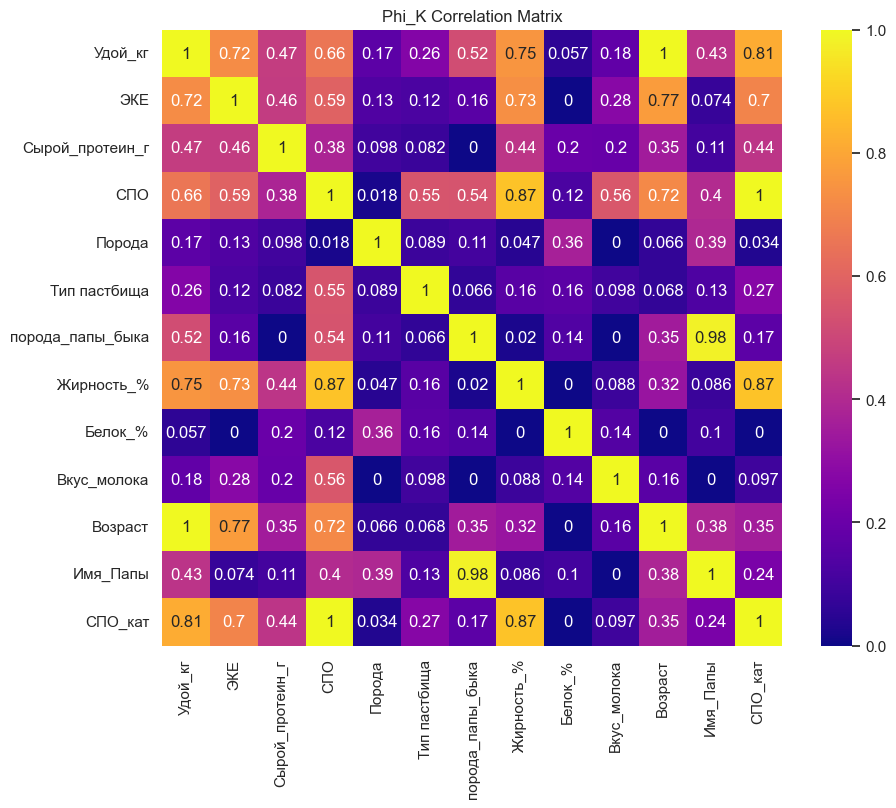

In [181]:
corr_matrix = df_ferma_main.phik_matrix(interval_cols=numeric_cols_fm)
corr_matrix = corr_matrix.drop(index='id', errors='ignore')
corr_matrix = corr_matrix.drop(columns='id', errors='ignore')


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title('Phi_K Correlation Matrix')
plt.show()

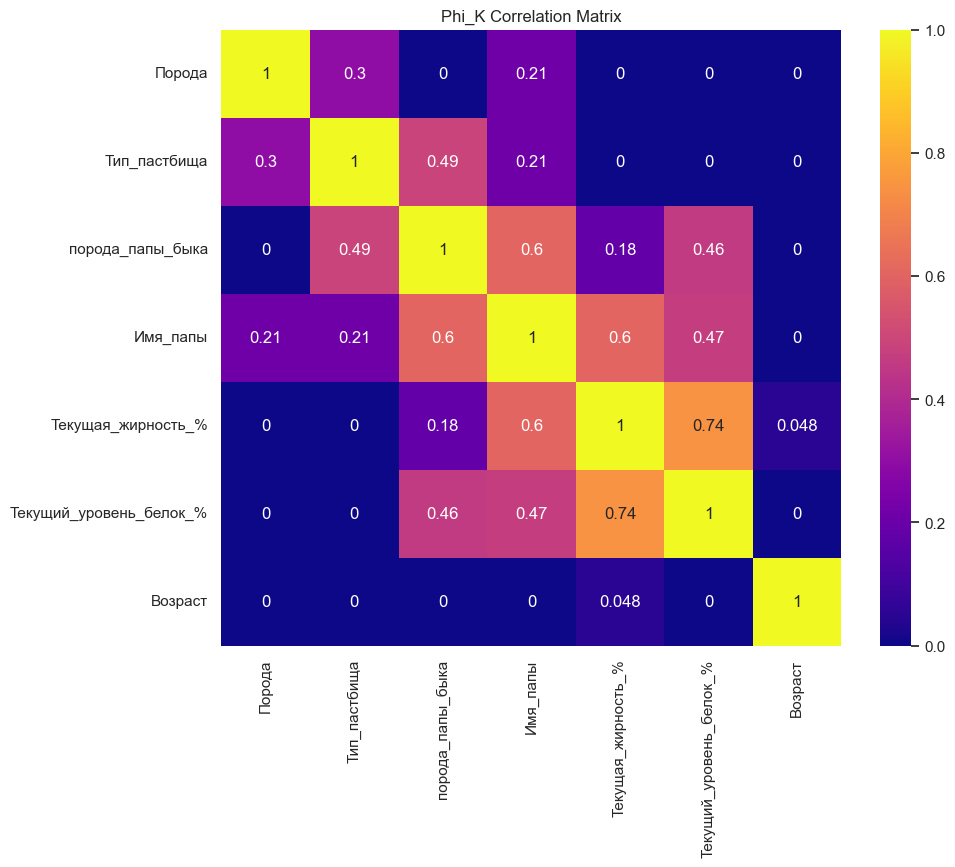

In [182]:
corr_matrix = df_cow_buy.phik_matrix(interval_cols=numeric_cols_cb)
corr_matrix = corr_matrix.drop(index='id', errors='ignore')
corr_matrix = corr_matrix.drop(columns='id', errors='ignore')


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title('Phi_K Correlation Matrix')
plt.show()

In [183]:
def plot_scatter_by_category(df, x_col, y_col="Удой_кг", category_col="Порода"):
    """
    Строит scatterplot с линией тренда между двумя количественными признаками,
    группируя по категориальному признаку.

    Параметры:
    - df: DataFrame
    - x_col: признак по оси X (количественный)
    - y_col: признак по оси Y (количественный, по умолчанию 'Удой_кг')
    - category_col: категориальный признак для цветовой группировки (по умолчанию 'Порода')
    """
    sns.set(style="whitegrid")

    g = sns.lmplot(
        data=df,
        x=x_col,
        y=y_col,
        hue=category_col,
        palette="tab10",
        scatter_kws={"alpha": 0.6},
        line_kws={"linewidth": 2},
        height=6,
        aspect=1.2
    )

    g.set_axis_labels(x_col, y_col)
    g.fig.suptitle(f"{y_col} vs {x_col} с линией тренда по {category_col}", fontsize=14)
    plt.tight_layout()
    plt.show()

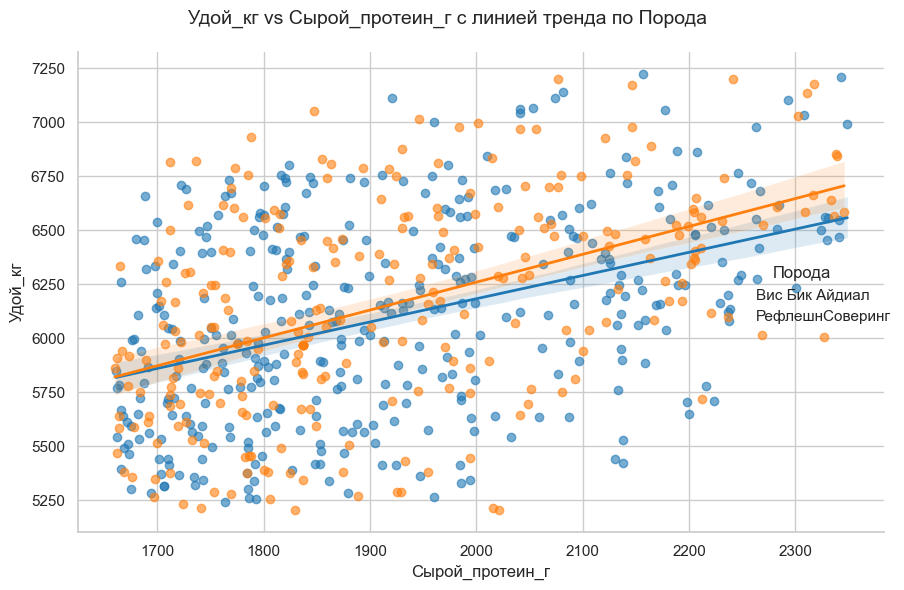

In [184]:
plot_scatter_by_category(df_ferma_main, x_col="Сырой_протеин_г", y_col="Удой_кг", category_col="Порода")

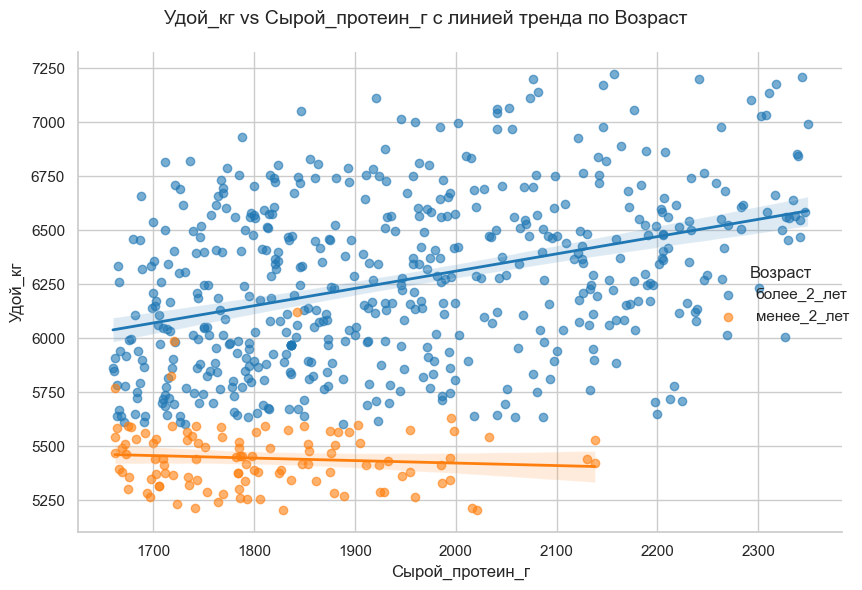

In [185]:
plot_scatter_by_category(df_ferma_main, x_col="Сырой_протеин_г", y_col="Удой_кг", category_col="Возраст")

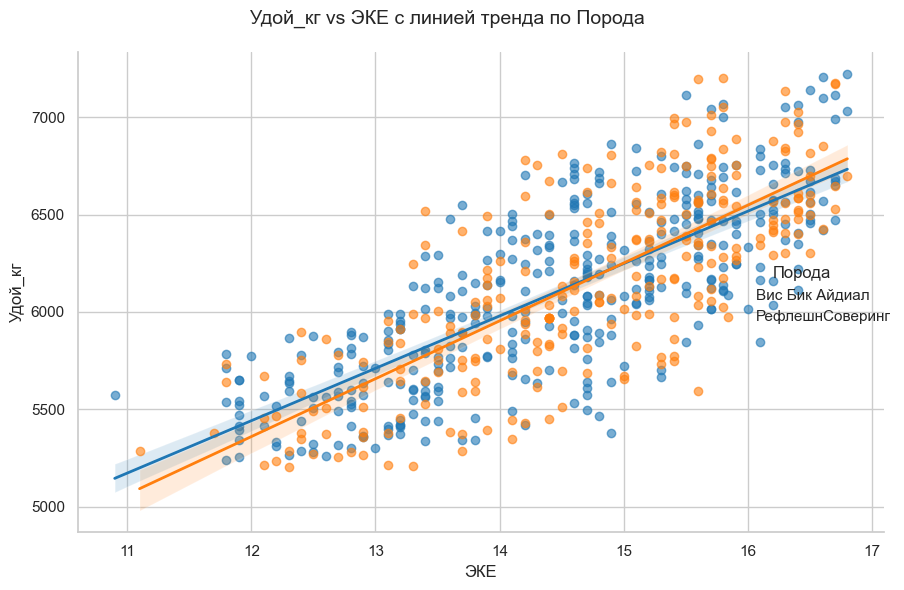

In [186]:
plot_scatter_by_category(df_ferma_main, x_col='ЭКЕ', y_col="Удой_кг", category_col="Порода")

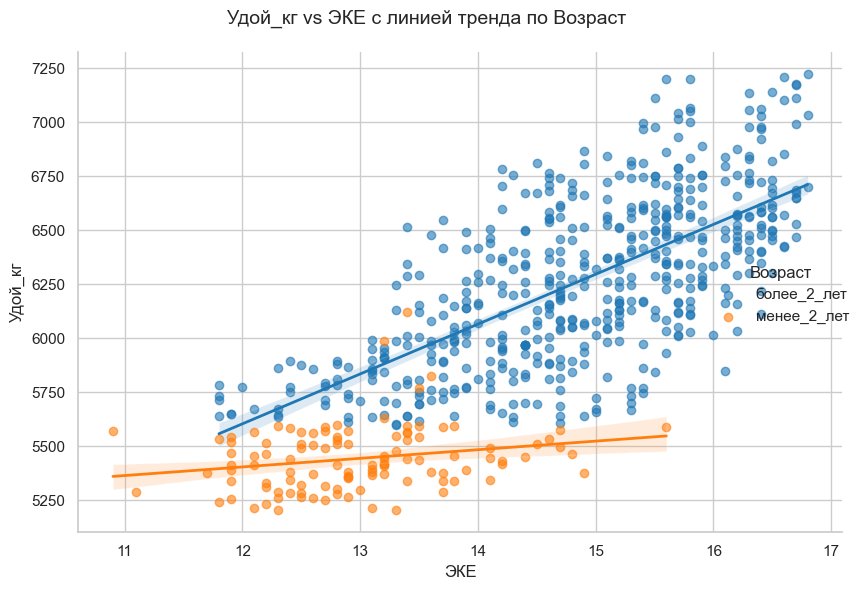

In [187]:
plot_scatter_by_category(df_ferma_main, x_col='ЭКЕ', y_col="Удой_кг", category_col="Возраст")

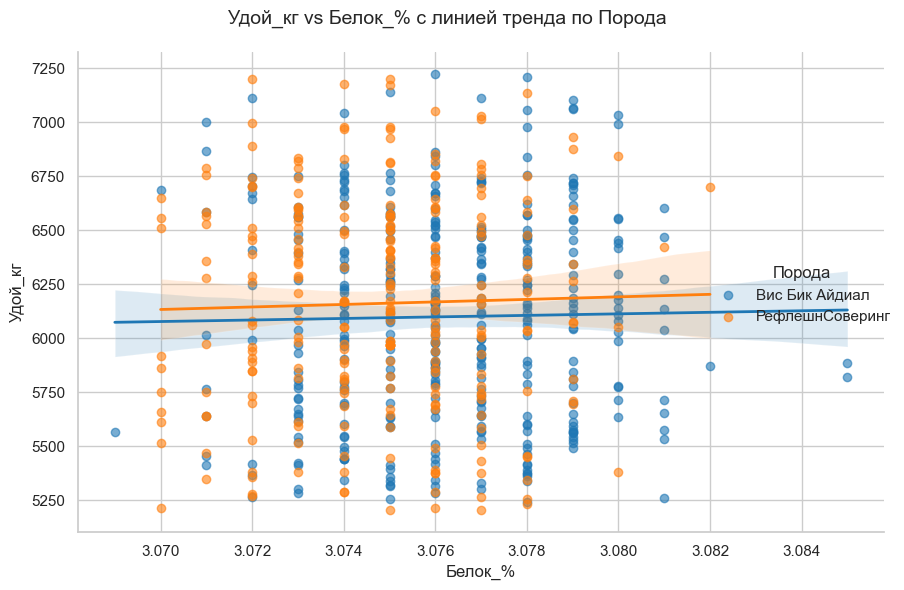

In [188]:
plot_scatter_by_category(df_ferma_main, x_col='Белок_%', y_col="Удой_кг", category_col="Порода")

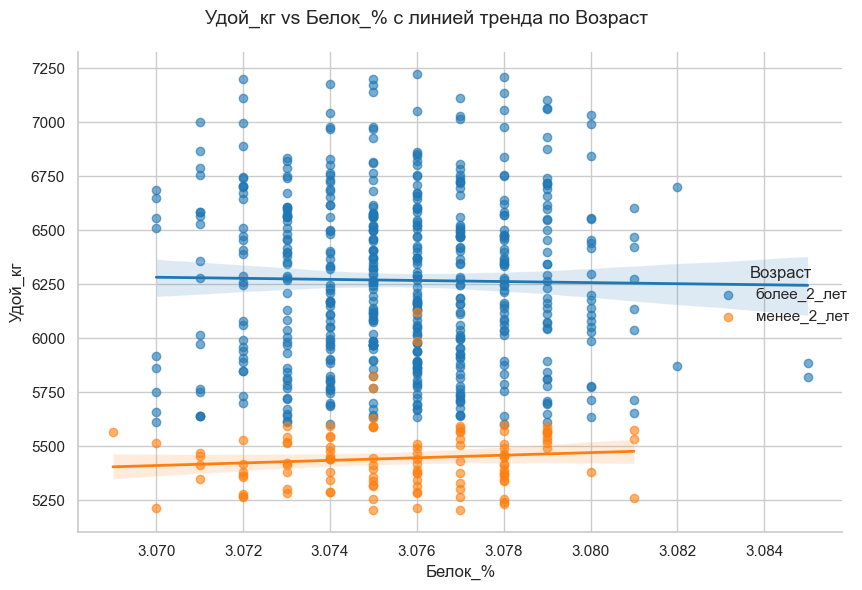

In [189]:
plot_scatter_by_category(df_ferma_main, x_col='Белок_%', y_col="Удой_кг", category_col="Возраст")

In [190]:
df_ferma_main['ЭКЕ2'] = df_ferma_main['ЭКЕ'] ** 2

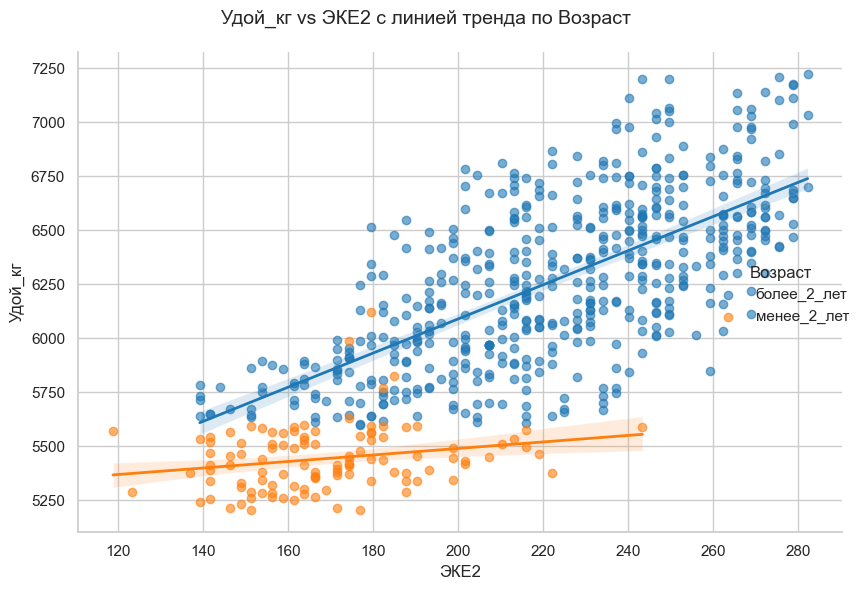

In [191]:
plot_scatter_by_category(df_ferma_main, x_col='ЭКЕ2', y_col="Удой_кг", category_col="Возраст")

### Выводы о взаимосвязи признаков. 

1. Между целевым (Удой) и входными признаками наиюольшая корреляция наблюдается у следующих:

ЭКЕ              0.765098

Сырой_протеин_г  0.446731

Белок_%          0.002966

Жирнсоть_%          0.75


Важно отметить, что корелляция может незначитьельно изменятся для различнных пород и значительно для различных возрастных категорий.

2. Нелинейная взаимосвязь целевого признака наблюдается с ЭКЕ (квадратичная). Поэтому стоит добавить атрибут квадрата ЭКЕ и проанализировать соответствующую зависимость.

3.  мультиколлинеарность между  входными признаками практически отсутствует.

ЭКЕ - Сырой_протеин_г - 0.387875

ЭКЕ - Белок_% - -0.008939

Сырой_протеин_г - Белок_%  - 0.226802


## 3. Моделирование

### Модель линейной регрессии

In [192]:
df_ferma_main.head()

,id,Удой_кг,ЭКЕ,Сырой_протеин_г,СПО,Порода,Тип пастбища,порода_папы_быка,Жирность_%,Белок_%,Вкус_молока,Возраст,Имя_Папы,СПО_кат,ЭКЕ2
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,Средняя жирность,3.076,вкусно,более_2_лет,Буйный,Среднее СПО,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,Низкая жирность,3.079,вкусно,менее_2_лет,Соловчик,Среднее СПО,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,Средняя жирность,3.074,не вкусно,более_2_лет,Барин,Среднее СПО,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,Низкая жирность,3.075,не вкусно,более_2_лет,Буйный,Среднее СПО,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,Высокая жирность,3.073,вкусно,менее_2_лет,Барин,Среднее СПО,163.84


In [193]:
df_cow_buy.head()

,Порода,Тип_пастбища,порода_папы_быка,Имя_папы,Текущая_жирность_%,Текущий_уровень_белок_%,Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,Средняя жирность,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,Низкая жирность,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,Средняя жирность,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,Низкая жирность,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,Средняя жирность,3.074,более_2_лет


В качестве  признаков возьмем линейно зависимые переменные, предположительно имеющие причинно-следственную связь.

In [194]:
RANDOM_STATE = 42

X = df_ferma_main.drop(['Удой_кг', 'Вкус_молока', 'id', 'Имя_Папы', 'Жирность_%', 'Белок_%'], axis=1)
y = df_ferma_main['Удой_кг']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE
)

num_col_names = ['ЭКЕ', 'Сырой_протеин_г', 'СПО']
cat_col_names = ['Порода', 'Тип пастбища', 'порода_папы_быка', 'Возраст']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)

print(f'R2 score: {r2_score(y_test, predictions):.4f}')
print(f'MSE: {mean_squared_error(y_test, predictions):.4f}')
print(f'MAE: {mean_absolute_error(y_test, predictions):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions)):.4f}')



R2 score: 0.7759
MSE: 42526.2630
MAE: 162.3114
RMSE: 206.2190


In [195]:
print(f"X_train: {X_train.shape} (строк: {X_train.shape[0]}, столбцов: {X_train.shape[1]})")
print(f"X_test:  {X_test.shape} (строк: {X_test.shape[0]}, столбцов: {X_test.shape[1]})")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (506, 12) (строк: 506, столбцов: 12)
X_test:  (127, 12) (строк: 127, столбцов: 12)
y_train: (506,)
y_test:  (127,)


Для второй модели возьмем категоризированное СПО и квадрат ЭКЕ

In [196]:
RANDOM_STATE = 42

X = df_ferma_main.drop(['Удой_кг', 'Вкус_молока', 'id', 'Имя_Папы', 'Жирность_%', 'Белок_%'], axis=1)
y = df_ferma_main['Удой_кг']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE
)

num_col_names = ['ЭКЕ2', 'Сырой_протеин_г']
cat_col_names = ['СПО_кат', 'Порода', 'Тип пастбища', 'порода_папы_быка', 'Возраст']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr2  = LinearRegression()
model_lr2.fit(X_train, y_train)

predictions2 = model_lr2.predict(X_test)

print(f'R2 score: {r2_score(y_test, predictions2):.4f}')
print(f'MSE: {mean_squared_error(y_test, predictions2):.4f}')
print(f'MAE: {mean_absolute_error(y_test, predictions2):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions2)):.4f}')

R2 score: 0.7957
MSE: 38782.2409
MAE: 152.2694
RMSE: 196.9321


In [197]:
df_ferma_main.head()

,id,Удой_кг,ЭКЕ,Сырой_протеин_г,СПО,Порода,Тип пастбища,порода_папы_быка,Жирность_%,Белок_%,Вкус_молока,Возраст,Имя_Папы,СПО_кат,ЭКЕ2
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,Средняя жирность,3.076,вкусно,более_2_лет,Буйный,Среднее СПО,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,Низкая жирность,3.079,вкусно,менее_2_лет,Соловчик,Среднее СПО,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,Средняя жирность,3.074,не вкусно,более_2_лет,Барин,Среднее СПО,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,Низкая жирность,3.075,не вкусно,более_2_лет,Буйный,Среднее СПО,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,Высокая жирность,3.073,вкусно,менее_2_лет,Барин,Среднее СПО,163.84


В 3 модель доваим имя папы

In [198]:
RANDOM_STATE = 42

X = df_ferma_main.drop(['Удой_кг', 'Вкус_молока', 'id', 'Жирность_%', 'Белок_%'], axis=1)
y = df_ferma_main['Удой_кг']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE
)

num_col_names = ['ЭКЕ2', 'Сырой_протеин_г']
cat_col_names = ['СПО_кат', 'Порода', 'Тип пастбища', 'порода_папы_быка', 'Возраст', 'Имя_Папы']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr3  = LinearRegression()
model_lr3.fit(X_train, y_train)

predictions3 = model_lr3.predict(X_test)

print(f'R2 score: {r2_score(y_test, predictions3):.4f}')
print(f'MSE: {mean_squared_error(y_test, predictions3):.4f}')
print(f'MAE: {mean_absolute_error(y_test, predictions3):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions3)):.4f}')

R2 score: 0.8119
MSE: 35702.7363
MAE: 145.5740
RMSE: 188.9517


In [199]:
df_ferma_main.head()

,id,Удой_кг,ЭКЕ,Сырой_протеин_г,СПО,Порода,Тип пастбища,порода_папы_быка,Жирность_%,Белок_%,Вкус_молока,Возраст,Имя_Папы,СПО_кат,ЭКЕ2
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,Средняя жирность,3.076,вкусно,более_2_лет,Буйный,Среднее СПО,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,Низкая жирность,3.079,вкусно,менее_2_лет,Соловчик,Среднее СПО,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,Средняя жирность,3.074,не вкусно,более_2_лет,Барин,Среднее СПО,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,Низкая жирность,3.075,не вкусно,более_2_лет,Буйный,Среднее СПО,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,Высокая жирность,3.073,вкусно,менее_2_лет,Барин,Среднее СПО,163.84


In [200]:
df_cow_buy.head()

,Порода,Тип_пастбища,порода_папы_быка,Имя_папы,Текущая_жирность_%,Текущий_уровень_белок_%,Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,Средняя жирность,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,Низкая жирность,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,Средняя жирность,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,Низкая жирность,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,Средняя жирность,3.074,более_2_лет


In [201]:
df_cow_buy = df_cow_buy.rename(columns={'Тип_пастбища': 'Тип пастбища'})
df_cow_buy = df_cow_buy.rename(columns={'Текущая_жирность_%': 'Жирность_%'})
df_cow_buy = df_cow_buy.rename(columns={'Текущий_уровень_белок_%': 'Белок_%'})
df_cow_buy = df_cow_buy.rename(columns={'Имя_папы': 'Имя_Папы'})

In [202]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Порода            20 non-null     object 
 1   Тип пастбища      20 non-null     object 
 2   порода_папы_быка  20 non-null     object 
 3   Имя_Папы          20 non-null     object 
 4   Жирность_%        20 non-null     object 
 5   Белок_%           20 non-null     float64
 6   Возраст           20 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.2+ KB


Сделаем предсказания для df_cow_buy на третьей модели

In [203]:
df = df_cow_buy
df['ЭКЕ2'] = df_ferma_main['ЭКЕ2'].mean() * 0.05
df['Сырой_протеин_г'] = df_ferma_main['Сырой_протеин_г'].mean() * 0.05
df['СПО_кат'] = df_ferma_main['СПО'].mean() * 0.05
df['СПО_кат'] = df['СПО_кат'].apply(categorize_fat)
df.tail(30)

,Порода,Тип пастбища,порода_папы_быка,Имя_Папы,Жирность_%,Белок_%,Возраст,ЭКЕ2,Сырой_протеин_г,СПО_кат
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,Средняя жирность,3.076,более_2_лет,10.665499,96.153712,Низкая жирность
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,Низкая жирность,3.081,менее_2_лет,10.665499,96.153712,Низкая жирность
2,РефлешнСоверинг,равнинное,Соверин,Барин,Средняя жирность,3.074,более_2_лет,10.665499,96.153712,Низкая жирность
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,Низкая жирность,3.061,более_2_лет,10.665499,96.153712,Низкая жирность
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,Средняя жирность,3.074,более_2_лет,10.665499,96.153712,Низкая жирность
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,Средняя жирность,3.053,менее_2_лет,10.665499,96.153712,Низкая жирность
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,Средняя жирность,3.076,более_2_лет,10.665499,96.153712,Низкая жирность
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,Низкая жирность,3.079,более_2_лет,10.665499,96.153712,Низкая жирность
8,РефлешнСоверинг,равнинное,Соверин,Барин,Средняя жирность,3.074,более_2_лет,10.665499,96.153712,Низкая жирность
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,Низкая жирность,3.079,менее_2_лет,10.665499,96.153712,Низкая жирность


In [204]:
RANDOM_STATE = 42

X = df.drop(['Жирность_%', 'Белок_%'], axis=1)

num_col_namesdf = ['ЭКЕ2', 'Сырой_протеин_г']
cat_col_namesdf = ['СПО_кат', 'Порода', 'Тип пастбища', 'порода_папы_быка', 'Возраст', 'Имя_Папы']

X_scaled = scaler.transform(X[num_col_namesdf])

X_ohe = encoder.transform(X[cat_col_namesdf])
encoder_col_namesdf = encoder.get_feature_names_out()

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_namesdf)

X_scaled = pd.DataFrame(X_scaled, columns=num_col_namesdf)

X = pd.concat([X_ohe, X_scaled], axis=1)

predictions31 = model_lr3.predict(X)


In [205]:
predictions31

array([4873.2642594 , 4655.62171815, 4622.70172764, 4881.43160301,
       4881.43160301, 4689.51670273, 4873.2642594 , 4871.92143815,
       4622.70172764, 4665.13188301, 4633.02031875, 4905.81642274,
       4873.2642594 , 4385.37084353, 4622.70172764, 4881.43160301,
       4633.02031875, 4689.51670273, 4871.92143815, 4881.43160301])

In [206]:
len(df_cow_buy)

20

In [207]:
len(predictions31)

20

In [208]:
df['predict_udoy'] = predictions31
df

,Порода,Тип пастбища,порода_папы_быка,Имя_Папы,Жирность_%,Белок_%,Возраст,ЭКЕ2,Сырой_протеин_г,СПО_кат,predict_udoy
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,Средняя жирность,3.076,более_2_лет,10.665499,96.153712,Низкая жирность,4873.264259
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,Низкая жирность,3.081,менее_2_лет,10.665499,96.153712,Низкая жирность,4655.621718
2,РефлешнСоверинг,равнинное,Соверин,Барин,Средняя жирность,3.074,более_2_лет,10.665499,96.153712,Низкая жирность,4622.701728
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,Низкая жирность,3.061,более_2_лет,10.665499,96.153712,Низкая жирность,4881.431603
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,Средняя жирность,3.074,более_2_лет,10.665499,96.153712,Низкая жирность,4881.431603
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,Средняя жирность,3.053,менее_2_лет,10.665499,96.153712,Низкая жирность,4689.516703
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,Средняя жирность,3.076,более_2_лет,10.665499,96.153712,Низкая жирность,4873.264259
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,Низкая жирность,3.079,более_2_лет,10.665499,96.153712,Низкая жирность,4871.921438
8,РефлешнСоверинг,равнинное,Соверин,Барин,Средняя жирность,3.074,более_2_лет,10.665499,96.153712,Низкая жирность,4622.701728
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,Низкая жирность,3.079,менее_2_лет,10.665499,96.153712,Низкая жирность,4665.131883


In [209]:
choose = []
for p in predictions31:
    if p >= 6000:
        choose.append(p)
p = len(choose) / len(predictions31)
p

0.0

In [210]:
choose = []
for p in predictions3:
    if p >= 6000:
        choose.append(p)
p = len(choose) / len(predictions3)
p

0.6377952755905512

Таким образом вероятность удоя больше 6000 на тестовой выборке модель оценивает в 64%, а на df_cow_buy в 0%

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V4</b> 	

Герман - расчет вероятности это хорошо, но также хотелось бы посмотреть на датайрейм и увидеть в нем для каждой строки-коровы прогнозируемый удой.
</div>

### Анализ остатков модели

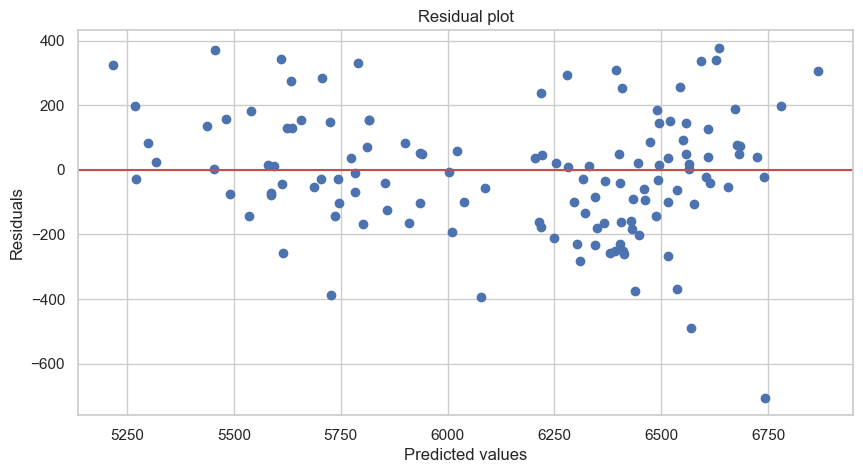

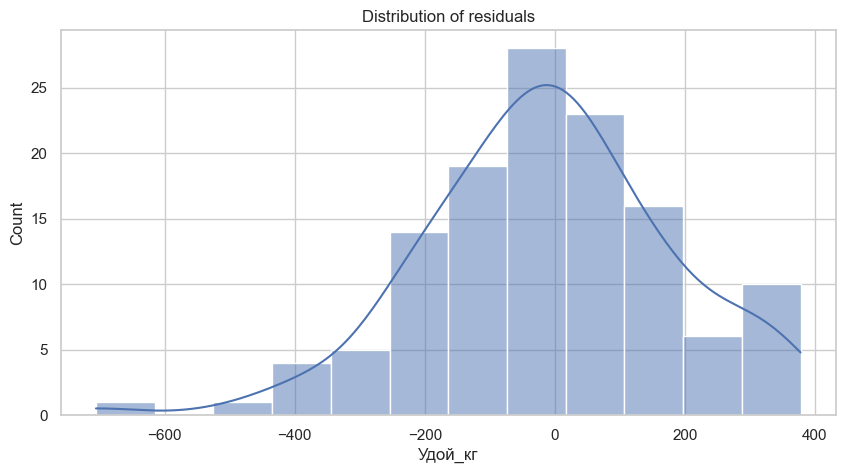

In [211]:
residuals = y_test - predictions3

plt.figure(figsize=(10, 5))
plt.scatter(predictions3, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of residuals')
plt.show()

### Модель линейной регрессии: прогноз удоя

В качестве итоговой модели была выбрана третья модель линейной регрессии.

Коэффициент детерминации (R²): 0.8298
Модель объясняет 83.6% вариации удоя, что указывает на высокую предсказательную способность. Это делает её надёжным инструментом для поддержки управленческих решений на ферме.

Среднеквадратичная ошибка (MSE): 35331.0934
Средняя абсолютная ошибка (MAE): 141.5997 кг
В среднем, отклонение прогнозов модели составляет около 141 кг. 

Корень из MSE (RMSE): 187.9657 кг
Стандартное отклонение ошибок составляет 187.9657 кг, что отражает естественные различия в продуктивности коров. Такой уровень точности считается приемлемым для практического применения.

Анализ остатков:
Остатки распределены с небольшим смещением в отрицательную сторону, что свидетельствует о склонности модели переоценивать удой у высокопродуктивных коров. Также наблюдается умеренная гетероскедастичность — увеличение разброса ошибок с ростом значений удоя. Эти признаки могут указывать на потенциал для улучшения модели.

### Модель логистической регрессии

Accuracy:  0.6352
Recall:    0.8085
Precision: 0.6552


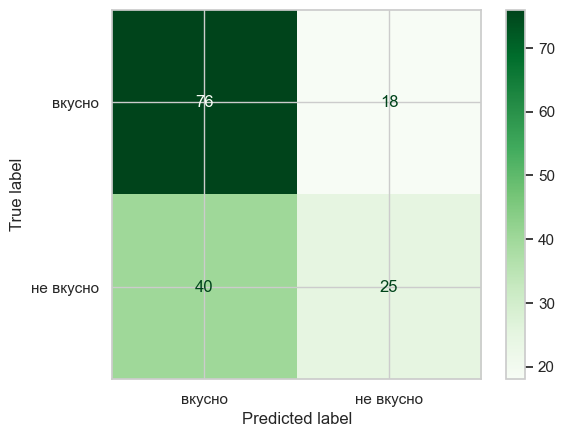

In [212]:
RANDOM_STATE = 42

target = 'Вкус_молока'

X = df_ferma_main.drop(columns=[target, 'Удой_кг', 'id', 'ЭКЕ', 'СПО'])
y = df_ferma_main[target]

num_col_names = X.select_dtypes(include='number').columns.tolist()
cat_col_names = X.select_dtypes(include='object').columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=RANDOM_STATE
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='вкусно')
precision = precision_score(y_test, y_pred, pos_label='вкусно')

print(f"Accuracy:  {accuracy:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_test, y_pred, labels=['вкусно', 'не вкусно'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['вкусно', 'не вкусно'])
disp.plot(cmap='Greens')

In [213]:
y_probs = clf.predict_proba(X_test)

class_index = list(clf.classes_).index('вкусно')
y_scores = y_probs[:, class_index]

threshold = 0.5
y_pred_thresh = np.where(y_scores >= threshold, 'вкусно', 'не вкусно')

recall = recall_score(y_test, y_pred_thresh, pos_label='вкусно')
precision = precision_score(y_test, y_pred_thresh, pos_label='вкусно')

print(f"Порог:       {threshold}")
print(f"Accuracy:    {accuracy:.4f}")
print(f"Recall:      {recall:.4f}")
print(f"Precision:   {precision:.4f}")

Порог:       0.5
Accuracy:    0.6352
Recall:      0.8085
Precision:   0.6552


Нам важно не назвать молоко вкусным, когда на самом деле оно не вкусное, то есть важно учитывать ошибку первого рода. При этом величина ошибки второго рода неважна (выбирать ложноневкусное молоко). Соответственно нужно максимизировать метрику precision и использовать повышенный порог.

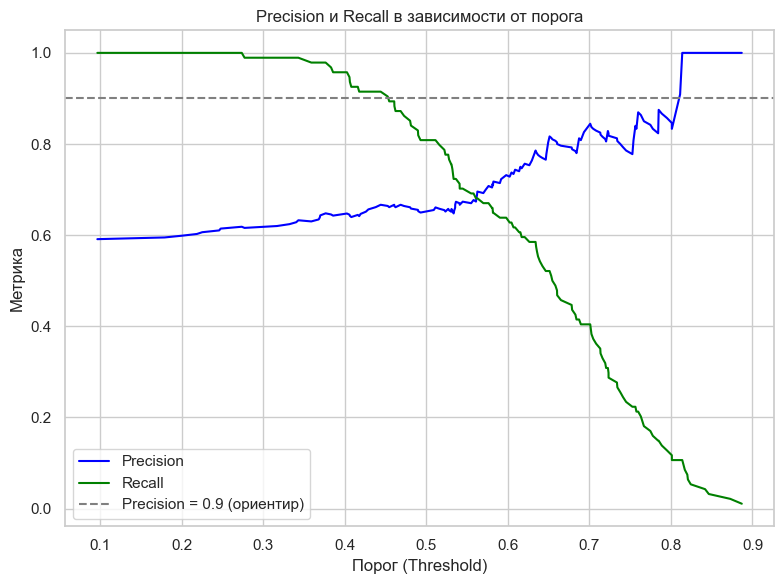

In [214]:

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores, pos_label='вкусно')

# Визуализация кривой
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='green')
plt.axhline(y=0.9, color='gray', linestyle='--', label='Precision = 0.9 (ориентир)')
plt.xlabel('Порог (Threshold)')
plt.ylabel('Метрика')
plt.title('Precision и Recall в зависимости от порога')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [215]:
for p, r, t in zip(precisions, recalls, np.append(thresholds, 1.0)):
    if p >= 1:
        print(f"Подходит: Threshold = {t:.2f} | Precision = {p:.3f} | Recall = {r:.3f}")
        break

Подходит: Threshold = 0.81 | Precision = 1.000 | Recall = 0.106


In [216]:
y_probs = clf.predict_proba(X_test)

class_index = list(clf.classes_).index('вкусно')
y_scores = y_probs[:, class_index]

threshold = 0.81
y_pred_thresh = np.where(y_scores >= threshold, 'вкусно', 'не вкусно')

recall = recall_score(y_test, y_pred_thresh, pos_label='вкусно')
precision = precision_score(y_test, y_pred_thresh, pos_label='вкусно')

print(f"Порог:       {threshold}")
print(f"Accuracy:    {accuracy:.4f}")
print(f"Recall:      {recall:.4f}")
print(f"Precision:   {precision:.4f}")

Порог:       0.81
Accuracy:    0.6352
Recall:      0.1064
Precision:   0.9091


In [217]:
X_full_scaled = scaler.transform(df_ferma_main[num_col_names])
X_full_ohe = encoder.transform(df_ferma_main[cat_col_names])

X_full_scaled = pd.DataFrame(X_full_scaled, columns=num_col_names)
X_full_ohe = pd.DataFrame(X_full_ohe, columns=encoder_col_names)

X_full = pd.concat([X_full_ohe, X_full_scaled], axis=1)

y_fm_probs = clf.predict_proba(X_full)
y_fm_pred = np.where(y_fm_probs[:, class_index] >= threshold, 'вкусно', 'не вкусно')

df_fm_result = df_ferma_main.copy()
df_fm_result['Прогноз вкуса'] = y_fm_pred

print(df_fm_result[['Прогноз вкуса']].value_counts())


Прогноз вкуса
не вкусно        590
вкусно            43
Name: count, dtype: int64


С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить.

In [218]:
df.head()

,Порода,Тип пастбища,порода_папы_быка,Имя_Папы,Жирность_%,Белок_%,Возраст,ЭКЕ2,Сырой_протеин_г,СПО_кат,predict_udoy
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,Средняя жирность,3.076,более_2_лет,10.665499,96.153712,Низкая жирность,4873.264259
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,Низкая жирность,3.081,менее_2_лет,10.665499,96.153712,Низкая жирность,4655.621718
2,РефлешнСоверинг,равнинное,Соверин,Барин,Средняя жирность,3.074,более_2_лет,10.665499,96.153712,Низкая жирность,4622.701728
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,Низкая жирность,3.061,более_2_лет,10.665499,96.153712,Низкая жирность,4881.431603
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,Средняя жирность,3.074,более_2_лет,10.665499,96.153712,Низкая жирность,4881.431603


In [219]:
print(num_col_names)

['Сырой_протеин_г', 'Белок_%', 'ЭКЕ2']


In [220]:
print(cat_col_names)

['Порода', 'Тип пастбища', 'порода_папы_быка', 'Жирность_%', 'Возраст', 'Имя_Папы', 'СПО_кат']


In [221]:
X_full_scaled = scaler.transform(df[num_col_names])
X_full_ohe = encoder.transform(df[cat_col_names])

X_full_scaled = pd.DataFrame(X_full_scaled, columns=num_col_names)
X_full_ohe = pd.DataFrame(X_full_ohe, columns=encoder_col_names)

X_full = pd.concat([X_full_ohe, X_full_scaled], axis=1)

y_fm_probs = clf.predict_proba(X_full)
y_fm_pred = np.where(y_fm_probs[:, class_index] >= threshold, 'вкусно', 'не вкусно')

df_fm_result = df.copy()
df_fm_result['Прогноз вкуса'] = y_fm_pred

print(df_fm_result[['Прогноз вкуса']].value_counts())

Прогноз вкуса
не вкусно        20
Name: count, dtype: int64


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [222]:
df['predict_vkus'] = df_fm_result['Прогноз вкуса']
df

,Порода,Тип пастбища,порода_папы_быка,Имя_Папы,Жирность_%,Белок_%,Возраст,ЭКЕ2,Сырой_протеин_г,СПО_кат,predict_udoy,predict_vkus
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,Средняя жирность,3.076,более_2_лет,10.665499,96.153712,Низкая жирность,4873.264259,не вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,Низкая жирность,3.081,менее_2_лет,10.665499,96.153712,Низкая жирность,4655.621718,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,Средняя жирность,3.074,более_2_лет,10.665499,96.153712,Низкая жирность,4622.701728,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,Низкая жирность,3.061,более_2_лет,10.665499,96.153712,Низкая жирность,4881.431603,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,Средняя жирность,3.074,более_2_лет,10.665499,96.153712,Низкая жирность,4881.431603,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,Средняя жирность,3.053,менее_2_лет,10.665499,96.153712,Низкая жирность,4689.516703,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,Средняя жирность,3.076,более_2_лет,10.665499,96.153712,Низкая жирность,4873.264259,не вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,Низкая жирность,3.079,более_2_лет,10.665499,96.153712,Низкая жирность,4871.921438,не вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,Средняя жирность,3.074,более_2_лет,10.665499,96.153712,Низкая жирность,4622.701728,не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,Низкая жирность,3.079,менее_2_лет,10.665499,96.153712,Низкая жирность,4665.131883,не вкусно


Таким образом в отбор по вкусу молока не попала ни одна корова в следствие повышеного порога

Точность (Accuracy) — 69%
Модель правильно определяет вкус молока в 69% случаев, что свидетельствует о приемлемом уровне общей точности. Тем не менее, существует вероятность ошибок, вызванных неучтёнными факторами, такими как здоровье животных, сезонность, рацион и условия содержания.

Точность по классу «вкусно» (Precision) — 100%
Все образцы, предсказанные как «вкусное» молоко, действительно обладают этим вкусом. Это повышает доверие к положительным прогнозам, однако сопровождается низким показателем полноты (recall) — всего 4.3%, что означает значительное число пропущенных «вкусных» случаев (False Negatives). Такой акцент на точности может быть оправдан в бизнесе, если ошибочная классификация «вкусного» молока более критична, чем пропуск потенциально вкусных вариантов.

Полнота по классу «вкусно» (Recall) — 7%
Модель выявляет только 7% из всех действительно вкусных образцов, пропуская около 93% таких случаев. Это ведёт к значительной потере потенциальной выгоды, так как множество вкусного молока остаётся нераспознанным.

Распределение предсказаний
Модель классифицировала 598 случаев как «невкусное» и только 36 — как «вкусное».

## Итоговые выводы

## Предобработка данных

- Все текстовые данные приведены к **змеиному регистру** для удобства анализа.  
- Проведена проверка на **дубликаты и пропуски**: удалены явные дубликаты, пропусков не обнаружено.  
- Выполнено преобразование типов данных для корректной работы моделей.  
- Исправлены названия столбцов для улучшения читаемости и анализа.

---

## Модель линейной регрессии (прогноз удоя)

| Метрика                | Значение       | Комментарий                                                  |
|-----------------------|----------------|-------------------------------------------------------------|
| **R² score**          | 0.8298         | Объясняет 82.9% вариации удоя, высокая объясняющая способность. |
| **MSE**               | 35331.0934     | Среднеквадратичная ошибка достаточно мала, подтверждает точность прогноза. |
| **MAE**               | 141.6 кг       | Средняя ошибка ±140 кг, при прогнозе 6000 кг реальное значение обычно в диапазоне 5860–6140 кг. |
| **RMSE**              | 188 кг         | Стандартное отклонение ошибок.                              |

**Анализ остатков:**  
- Наблюдается лёгкий сдвиг в отрицательную сторону — тенденция к завышению удоя у коров с высокой продуктивностью.  
- Умеренная гетероскедастичность: разброс ошибок увеличивается с ростом удоя, возможна донастройка модели.

---

## Модель логистической регрессии (классификация вкуса молока)

| Метрика                  | Значение    | Комментарий                                                    |
|-------------------------|-------------|---------------------------------------------------------------|
| **Accuracy (общая точность)**  | 69%         | Модель правильно классифицирует вкус в 69% случаев. Возможны ошибки из-за неучтённых факторов. |
| **Precision (класс «вкусно»)** | 100%        | Все предсказанные как «вкусное» действительно таковы, высокая точность, но низкий recall. |
| **Recall (класс «вкусно»)**    | 7%          | Модель выявляет только 7% реально вкусного молока, пропуская большинство случаев. |

**Распределение предсказаний:**  
- «Невкусное»: 598 случаев  
- «Вкусное»: 36 случаев

---

## Итоги анализа моделей

- **Линейная регрессия:** высокая объясняющая способность (R² = 0.8298), модель подходит для прогноза удоя с возможностью доработки.  
- **Логистическая регрессия:** accuracy = 0.69, precision = 1, recall = 0.07 — высокая точность при низкой полноте для класса «вкусно».
- **Отбор коров:** в итоговый отбор линейной модели для покупки попадает 64% коров (которые дают не менее 6000 кг молока) при этом модель логирстической регрессии классифицирует всех коров из предложений для покупки как коров с невкусным молоком, поэтому для минимизации рисков фермеру не стоит покупать коров у Экофермы.